<a href="https://colab.research.google.com/github/richardzefan/Home-Credit-Default-Risk/blob/main/HOME_CREDIT_DEFAULT_RISK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Table of Contents
1. [Introduction](#introduction)
2. [Data Preparation](#dataprep)
3. [Exploratory Data Analysis](#eda)
4. [Data Wrangling](#wrangling)
5. [Feature Engineering](#engineering)
6. [Model training and Evaluation](#algorithm)
7. [Implementation](#implementation)

<a id='introduction'></a>
# Introduction

* Objective: **Predict whether a loan applicant is capable of repaying the intended borrowed amount.**

This is a standard binary classification problem since we'll be predicting a category for an applicant.

* Learning Model: **Supervised Learning Classification model**


<a id="dataprep"></a>
# Data Preparation


In [1]:
pip install --upgrade matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# import packages
import os
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

There are 10 files in our library: 7 of them are data sources, and the remaining 3 are the train, test, and sample submission files. We'll check on the main file first (application_train.csv) and see what we can make out of it, then use the test set (application_test.csv) to make our submission. 

*Note: It's probably best to consider all the source files, but since it is quite overwhelming for me, I'll first start small and make another notebook (or update this notebook) for future improvements.*

*File reference can be found [here](http://www.kaggle.com/c/home-credit-default-risk/data?select=HomeCredit_columns_description.csv).

In [4]:
# LOAD THE TRAINING SET
df_train = pd.read_csv('/content/drive/MyDrive/SI @RUANGGURU-CAMP : DATA,BUSINESS ANALYTICS & OPERATIONS/7. VIRTUAL INTERN RAKAMIN/HOME-CREDIT-INDONESIA/application_train.csv')
df_train.info(verbose=True, null_counts=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: null_counts is deprecated. Use show_counts instead
  This is separate from the ipykernel package so we can avoid doing imports until


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [5]:
# LOAD THE TEST SET
df_test = pd.read_csv('/content/drive/MyDrive/SI @RUANGGURU-CAMP : DATA,BUSINESS ANALYTICS & OPERATIONS/7. VIRTUAL INTERN RAKAMIN/HOME-CREDIT-INDONESIA/application_test.csv')
df_test.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 121 columns):
 #    Column                        Non-Null Count  Dtype  
---   ------                        --------------  -----  
 0    SK_ID_CURR                    48744 non-null  int64  
 1    NAME_CONTRACT_TYPE            48744 non-null  object 
 2    CODE_GENDER                   48744 non-null  object 
 3    FLAG_OWN_CAR                  48744 non-null  object 
 4    FLAG_OWN_REALTY               48744 non-null  object 
 5    CNT_CHILDREN                  48744 non-null  int64  
 6    AMT_INCOME_TOTAL              48744 non-null  float64
 7    AMT_CREDIT                    48744 non-null  float64
 8    AMT_ANNUITY                   48720 non-null  float64
 9    AMT_GOODS_PRICE               48744 non-null  float64
 10   NAME_TYPE_SUITE               47833 non-null  object 
 11   NAME_INCOME_TYPE              48744 non-null  object 
 12   NAME_EDUCATION_TYPE           48744 non-null

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: null_counts is deprecated. Use show_counts instead
  This is separate from the ipykernel package so we can avoid doing imports until


* For the training file, we have a total of **307511 observations** and **122 features** to consider -- with integer, float and object datatypes, and 67 features having null values.

* The test file is almost similar: having **48744 observations**, **121 features** (minus the predictor variable 'TARGET'), and 64 features having null values.


Note on the words being used: 

* **observations** == samples == rows
* **features** == fields == columns
* **defaulted** == failed to meet the legal obligations of the loan

In [6]:
# Print first 5 rows of the training file
df_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

Since our model is to classify the 'target' column, we can plot it to visualize the current sample distribution.

0    282686
1     24825
Name: TARGET, dtype: int64


[Text(0, 0, '282686 (92%)'), Text(0, 0, '24825 (8%)')]

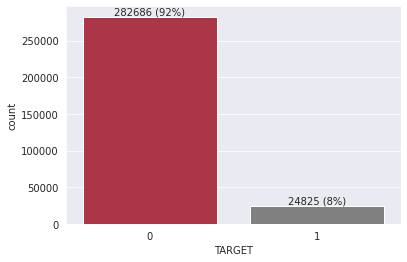

In [7]:
# Show target distribution
sns.set_style('darkgrid')
print(df_train.TARGET.value_counts())
# Distribution of target
clrs = ['grey' if (x < max(df_train['TARGET'].value_counts())) else '#BE223A' for x in df_train['TARGET'].value_counts() ]

ax = sns.countplot(x=df_train['TARGET'],
                   palette = clrs,
                   order=df_train['TARGET'].value_counts(ascending=False).index);
        
abs_values =df_train['TARGET'].value_counts(ascending=False)
rel_values =df_train['TARGET'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)

Base on the above information, the dataset is **imbalanced**. Only around 8% of the training set aren't repaid.



JUST TO BE CLEAR, OUR INDICATOR ON WHETHER A CURRENT/ PREVIOUS CUSTOMER DEFAULTED ON A LOAN CAN BE SEEN AT 'TARGET' COLUMN:

**TARGET == 0 --> individuals who paid their loan**

**TARGET == 1 --> individuals who did NOT repay their loan**

Now, let's take a closer look on the fields.

<a id='eda'></a>
# Exploratory Data Analysis

We'll be taking note of the things below during our field inspection:

1. **Completing** - any missing values to fill in?
2. **Correlation** - which features contribute significantly to our solution goal?
3. **Correcting** - any outlier that skews our data terribly? Do we have some unusual error seen on the dataset? We may need to correct or exclude inaccurate features.
4. **Conversion** - most of the time, the text features need to be converted to numerical values for our model training.
5. **Creating** - maybe we can create a new feature out of the existing set of highly correlated features?

Before anything else, it's important to understand why these fields are recorded in the first place. And below is my understanding on how do we know if an applicant is a good candidate for a loan application. 

(I'm not claiming that this is right, but for me, this makes sense.)

During field inspection, I'll try to comprehend whether a certain field falls on any of these questions. It can serve as a guide on how we deal with a certain feature. Below are excel sheet snippets of the initial sorting that I made on all the fields (please see TAG column).

Decisions:
* 'SK_ID_CURR' is just the loan ID which is unique for every individual. It will not contribute to the prediction algorithm. --> DROP
* The 'TARGET' variable is the one that we are trying to predict, so we will NOT use it as a feature.

In [8]:
# COLUMNS TO BE DROPPED
list_col_drop = ['SK_ID_CURR']

In [9]:
tempY=df_train[df_train.FLAG_OWN_CAR=='Y']
tempN=df_train[df_train.FLAG_OWN_CAR=='N']
tempY_targ1=tempY[tempY.TARGET==1]
tempN_targ1=tempN[tempN.TARGET==1]

In [10]:
print('People count who owns a car:',len(tempY),'(',round(len(tempY)/len(df_train.index)*100,2),'%)')
print('People count who DOES NOT own a car:',len(tempN),'(',round(len(tempN)/len(df_train.index)*100,2),'%)')
print('Percentage of people who defaulted (with cars):',round(len(tempY_targ1)/len(tempY)*100,2),'%')
print('Percentage of people who defaulted (no cars):',round(len(tempN_targ1)/len(tempN)*100,2),'%')

People count who owns a car: 104587 ( 34.01 %)
People count who DOES NOT own a car: 202924 ( 65.99 %)
Percentage of people who defaulted (with cars): 7.24 %
Percentage of people who defaulted (no cars): 8.5 %


In [11]:
tempY=df_train[df_train.FLAG_OWN_REALTY=='Y']
tempN=df_train[df_train.FLAG_OWN_REALTY=='N']
tempY_targ1=tempY[tempY.TARGET==1]
tempN_targ1=tempN[tempN.TARGET==1]

In [12]:
print('People count who DOES NOT own realty:',len(tempN),'(',round(len(tempN)/len(df_train.index)*100,2),'%)')
print('Percentage of people who defaulted (with realty):',round(len(tempY_targ1)/len(tempY)*100,2),'%')
print('Percentage of people who defaulted (no realty):',round(len(tempN_targ1)/len(tempN)*100,2),'%')

People count who DOES NOT own realty: 94199 ( 30.63 %)
Percentage of people who defaulted (with realty): 7.96 %
Percentage of people who defaulted (no realty): 8.32 %


Observations:
* It's a small difference but it looks like people with no car and/or realty tend to default more than those who have. 

Decisions:
* I'll be converting these 2 categorical fields into one nominal field called 'assets'.

In [13]:
# CREATE NEW COLUMN : 0 - none, 1 - with car no realty, 2 - no car with realty, 3 - with car with realty
list_col_new_asset = ['FLAG_OWN_CAR','FLAG_OWN_REALTY'] 

The expenditure-related set is quite a lot. We can break it down base on the fields' relatedness.

Expenditure-related: THE LOAN ITSELF.

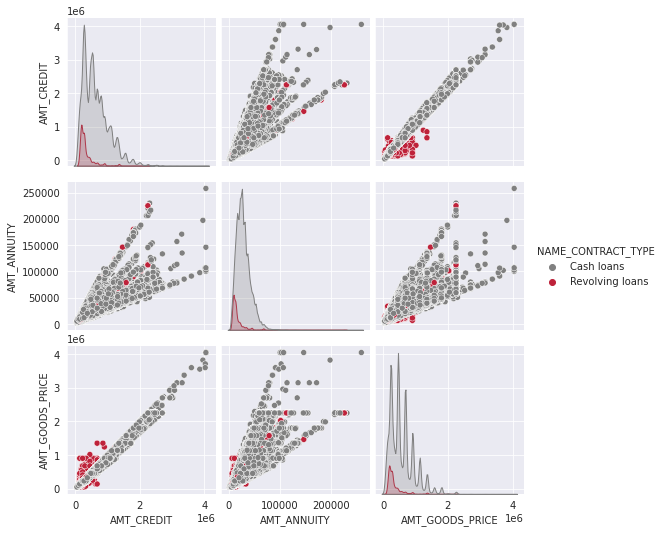

In [14]:
sns.pairplot(df_train[['NAME_CONTRACT_TYPE','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']],
             hue='NAME_CONTRACT_TYPE', palette = ['grey','#BE223A']);

In [15]:
corr1=round(df_train.AMT_CREDIT.corr(df_train.AMT_GOODS_PRICE),2)
corr2=round(df_train.AMT_ANNUITY.corr(df_train.AMT_CREDIT),2)
corr3=round(df_train.AMT_ANNUITY.corr(df_train.AMT_GOODS_PRICE),2)

In [16]:
print('Correlation of Credit amount vs Price of goods:',corr1)
print('Correlation of Annuity amount vs Credit amount:',corr2)
print('Correlation of Annuity amount vs Price of goods:',corr3)

Correlation of Credit amount vs Price of goods: 0.99
Correlation of Annuity amount vs Credit amount: 0.77
Correlation of Annuity amount vs Price of goods: 0.78


In [17]:
cash=df_train[df_train.NAME_CONTRACT_TYPE == 'Cash loans']
rev=df_train[df_train.NAME_CONTRACT_TYPE == 'Revolving loans']
def_cash=cash[cash.TARGET==1]
def_rev=rev[rev.TARGET==1]

Percentage of defaulted cash loan: 8.35 %
Percentage of defaulted revolving loan: 5.48 %


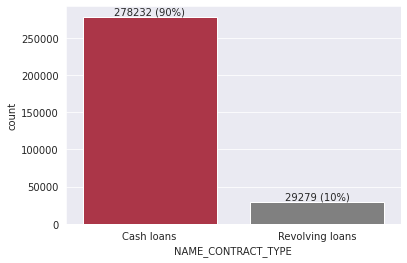

In [18]:
print('Percentage of defaulted cash loan:',round(len(def_cash)/len(cash)*100,2,),'%')
print('Percentage of defaulted revolving loan:',round(len(def_rev)/len(rev)*100,2),'%')
clrs = ['grey' if (x < max(df_train['TARGET'].value_counts())) else '#BE223A' for x in df_train['TARGET'].value_counts() ]
ax = sns.countplot(data=df_train,x='NAME_CONTRACT_TYPE',palette=clrs,
                   order=df_train['NAME_CONTRACT_TYPE'].value_counts(ascending=False).index);
        
abs_values =df_train['NAME_CONTRACT_TYPE'].value_counts(ascending=False)
rel_values =df_train['NAME_CONTRACT_TYPE'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)

plt.show()

Observations:
* AMT_CREDIT and AMT_GOODS_PRICE are highly correlated (scoring 0.99!), and has a positive linear slope - which makes sense because as the price of goods for which the loan is given gets higher, the credit amount of the loan (ofcourse) gets higher too.
* AMT_ANNUITY is also highly correlated to AMT_CREDIT and AMT_GOODS_PRICE with a positive linearity. It's because the annuity is the monthly due amount.
* NAME_CONTRACT_TYPE: Accounting for those who defaulted is much bigger in terms of cash loan than those with revolving loan, however, we must note that cash loan is *significantly* more popular to our sample consumers than the other. 

Decisions:
* AMT_GOODS_PRICE - to drop as it is quite redundant. We already have the AMT_CREDIT field to account for the loan amount.
* AMT_ANNUITY - create new feature PERCENT_ANNUITY_INCOME to indicate the loan annuity amount relative to the person's total income.
* AMT_CREDIT - create new feature PERCENT_CREDIT_INCOME to indicate the loan credit amount relative to the person's total income.
* NAME_CONTRACT_TYPE - to drop since the defaulting rate for both loan type has less than 3% difference. We can focus more on the person's percentage of annuity or credit amount relative to their income.

In [19]:
# COLUMNS TO BE DROPPED
list_col_drop.extend(['NAME_CONTRACT_TYPE','AMT_GOODS_PRICE'])

# CREATE NEW COLUMN : PERCENT_ANNUITY_INCOME
list_col_new_annuity = ['AMT_ANNUITY','AMT_INCOME_TOTAL']

# CREATE NEW COLUMN : CREDIT_ANNUITY_INCOME
list_col_new_credit = ['AMT_CREDIT','AMT_INCOME_TOTAL']

Expenditure-related: SIZE OF HOUSEHOLD

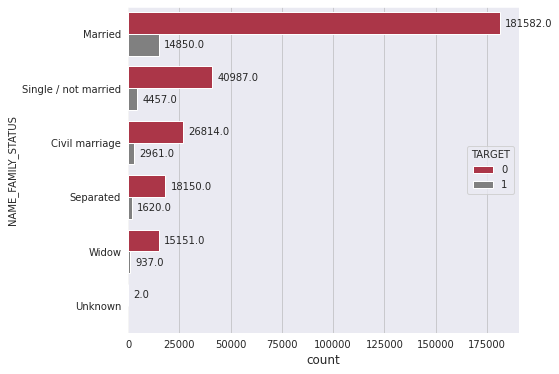

In [20]:


f, ax = plt.subplots(figsize=(7, 6))

clrs = ['grey' if (x < max(df_train['NAME_FAMILY_STATUS'].value_counts())) else '#BE223A' for x in df_train['NAME_FAMILY_STATUS'].value_counts() ]

sns.countplot(y="NAME_FAMILY_STATUS", data=df_train, hue='TARGET',palette=clrs,order =df_train['NAME_FAMILY_STATUS'].value_counts().index)

for p in ax.patches:  
  ax.annotate(p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
              xytext=(5, 0), textcoords='offset points', ha="left", va="center")

plt.grid(color='darkgray', axis='x', linestyle='-', linewidth=0.5)
plt.xlabel('count', fontsize=12)
plt.show()

In [21]:
df_train[['CNT_CHILDREN','NAME_FAMILY_STATUS','CNT_FAM_MEMBERS']][df_train.NAME_FAMILY_STATUS=='Married'].tail()

CNT_CHILDREN NAME_FAMILY_STATUS  CNT_FAM_MEMBERS
307500             0            Married              2.0
307501             3            Married              5.0
307502             1            Married              3.0
307509             0            Married              2.0
307510             0            Married              2.0

Observations:
* We have a large number of married customers in our sample population. The married set also contains the most frequent defaulting individuals.
* 'CNT_CHILDREN', 'NAME_FAMILY_STATUS', 'CNT_FAM_MEMBERS' are all related to family size. And if we only want to consider the family size for approximation of expenditures, we already have 'CNT_FAM_MEMBERS' wherein it accounts for the customer itself, plus spouse (if any), plus number of children (if any).

Decisions:
* Use 'CNT_FAM_MEMBER' as a feature model. Fill in missing values.
* Drop 'CNT_CHILDREN' and 'NAME_FAMILY_STATUS'.

In [22]:
# COLUMNS TO BE DROPPED
list_col_drop.extend(['CNT_CHILDREN', 'NAME_FAMILY_STATUS'])

# COMPLETE COLUMN : 
list_col_fill_fam = ['CNT_FAM_MEMBERS']

Expenditure-related: TRAVEL

In [23]:
corr1=round(df_train.OWN_CAR_AGE.corr(df_train.TARGET),2)
corr2=round(df_train.REG_REGION_NOT_WORK_REGION.corr(df_train.TARGET),2)
corr3=round(df_train.REG_CITY_NOT_WORK_CITY.corr(df_train.TARGET),2)
no_car,yes_car = df_train.FLAG_OWN_CAR.value_counts()

In [24]:
print('Correlation of Age of Car vs Target:',corr1)
print('Correlation of Registered Region aint Work Region vs Target:',corr2)
print('Correlation of Registered City aint Work City vs Target:',corr3)

Correlation of Age of Car vs Target: 0.04
Correlation of Registered Region aint Work Region vs Target: 0.01
Correlation of Registered City aint Work City vs Target: 0.05


In [25]:
df_train[['OWN_CAR_AGE','REG_REGION_NOT_WORK_REGION','REG_CITY_NOT_WORK_CITY']].describe()

OWN_CAR_AGE  REG_REGION_NOT_WORK_REGION  REG_CITY_NOT_WORK_CITY
count  104582.000000               307511.000000           307511.000000
mean       12.061091                    0.050769                0.230454
std        11.944812                    0.219526                0.421124
min         0.000000                    0.000000                0.000000
25%         5.000000                    0.000000                0.000000
50%         9.000000                    0.000000                0.000000
75%        15.000000                    0.000000                0.000000
max        91.000000                    1.000000                1.000000

In [26]:
print('How many customers own a car? :',yes_car)
print('How many customers do NOT own a car? :',no_car)
print('How many missing values on OWN_CAR_AGE? :',df_train.OWN_CAR_AGE.isnull().sum())

How many customers own a car? : 104587
How many customers do NOT own a car? : 202924
How many missing values on OWN_CAR_AGE? : 202929


Observations:
* We have a low correlation between these travel-related fields and the target variable.
* The number of missing values on 'OWN_CAR_AGE' is almost == number of customers who do NOT own a car -- which CAUSES the field to have missing values.

Decisions:
* Drop REG_REGION_NOT_WORK_REGION and REG_CITY_NOT_WORK_CITY as there is low correlation wrt TARGET variable.
* Create new ordinal category 'Car Expenditure' from a continuous numerical feature 'OWN_CAR_AGE'. Perhaps the older the car, the higher the maintenance expenditure.

In [27]:
# CREATE NEW COLUMN : EXPENDITURE_CAR : 0 - no car, +=1 per age band
list_col_new_car = ['OWN_CAR_AGE']

# COLUMNS TO BE DROPPED
list_col_drop.extend(['REG_REGION_NOT_WORK_REGION','REG_CITY_NOT_WORK_CITY'])

Expenditure-related: RESIDENCE

In [28]:
temp = ['NAME_HOUSING_TYPE',
        'APARTMENTS_AVG',
        'BASEMENTAREA_AVG',
        'YEARS_BEGINEXPLUATATION_AVG',
        'YEARS_BUILD_AVG',
        'COMMONAREA_AVG',
        'ELEVATORS_AVG',
        'ENTRANCES_AVG',
        'FLOORSMAX_AVG',
        'FLOORSMIN_AVG',
        'LANDAREA_AVG',
        'LIVINGAPARTMENTS_AVG',
        'LIVINGAREA_AVG',
        'NONLIVINGAPARTMENTS_AVG',
        'NONLIVINGAREA_AVG',
        'APARTMENTS_MODE',
        'BASEMENTAREA_MODE',
        'YEARS_BEGINEXPLUATATION_MODE',
        'YEARS_BUILD_MODE',
        'COMMONAREA_MODE',
        'ELEVATORS_MODE',
        'ENTRANCES_MODE',
        'FLOORSMAX_MODE',
        'FLOORSMIN_MODE',
        'LANDAREA_MODE',
        'LIVINGAPARTMENTS_MODE',
        'LIVINGAREA_MODE',
        'NONLIVINGAPARTMENTS_MODE',
        'NONLIVINGAREA_MODE',
        'APARTMENTS_MEDI',
        'BASEMENTAREA_MEDI',
        'YEARS_BEGINEXPLUATATION_MEDI',
        'YEARS_BUILD_MEDI',
        'COMMONAREA_MEDI',
        'ELEVATORS_MEDI',
        'ENTRANCES_MEDI',
        'FLOORSMAX_MEDI',
        'FLOORSMIN_MEDI',
        'LANDAREA_MEDI',
        'LIVINGAPARTMENTS_MEDI',
        'LIVINGAREA_MEDI',
        'NONLIVINGAPARTMENTS_MEDI',
        'NONLIVINGAREA_MEDI',
        'FONDKAPREMONT_MODE',
        'HOUSETYPE_MODE',
        'TOTALAREA_MODE',
        'WALLSMATERIAL_MODE',
        'EMERGENCYSTATE_MODE']

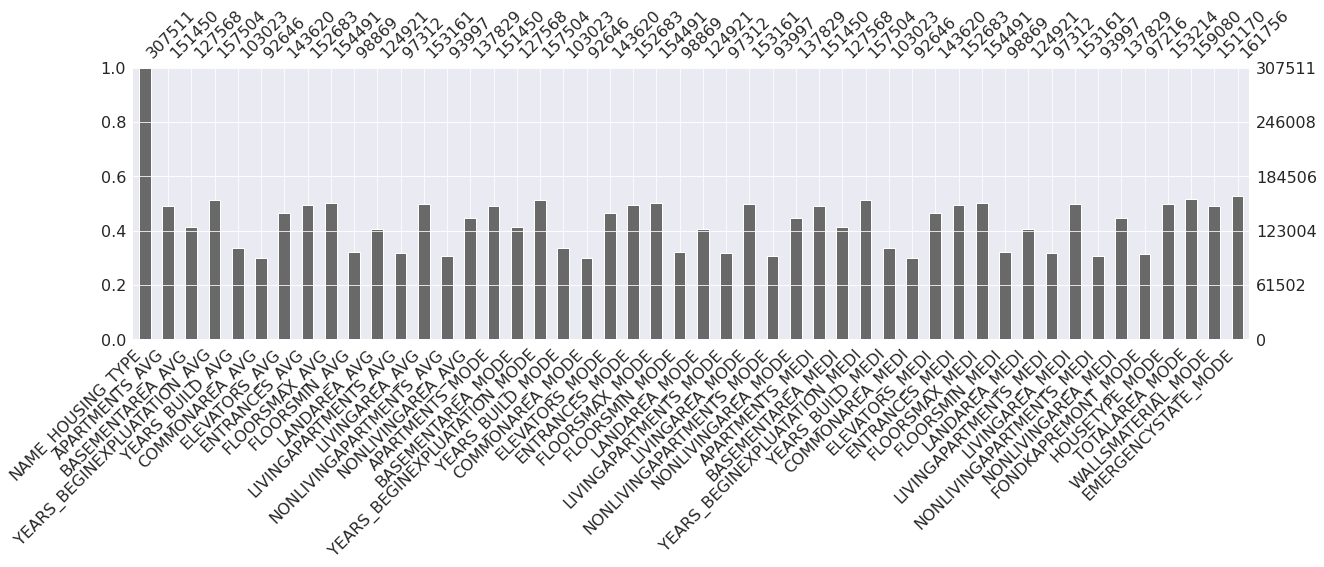

In [29]:
# Nullity by column
msno.bar(df_train[temp],figsize=(20,5));

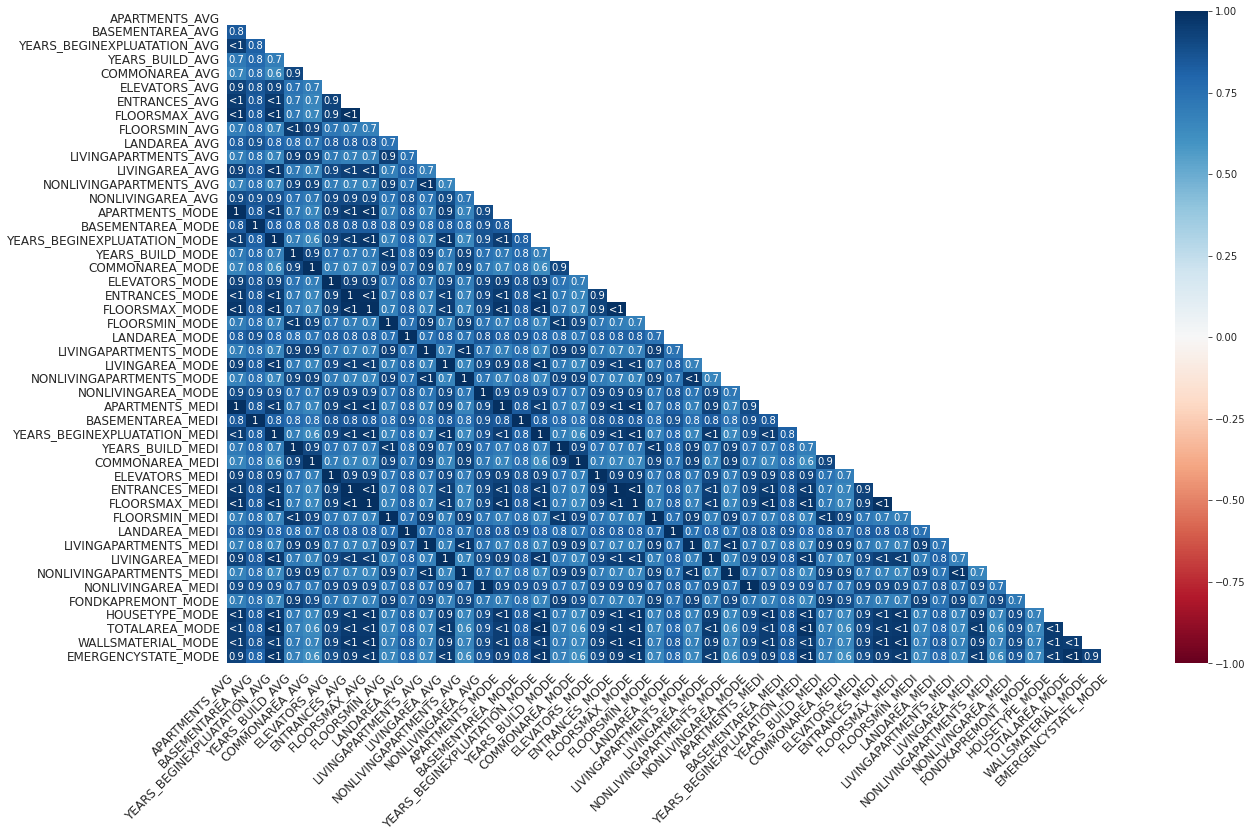

In [30]:
msno.heatmap(df_train[temp],fontsize=12);

This heatmap above shows the correlation of those fields with null values: how strongly the presence or absence of one variable affects the presence of another.

* 1 : positive correlation (blue) >> if a variable appears, the other variable definitely does too.
* 0 : zero correlation (white) >> variables appearing or not appearing have no effect on one another.
* -1 : negative correlation (red) >> if a variable appears, the other variable definitely does NOT.

(BTW, so thankful I stumbled upon this awesome package for missing values! Check it out [here](http://github.com/ResidentMario/missingno)!)

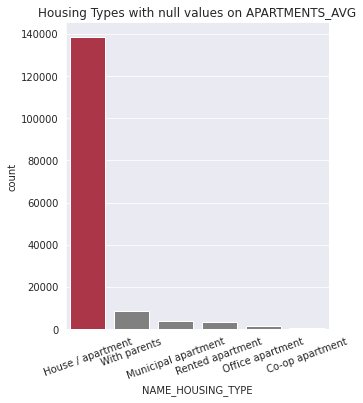

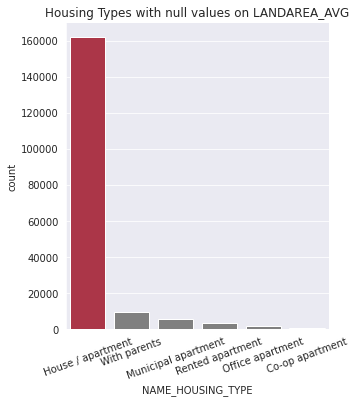

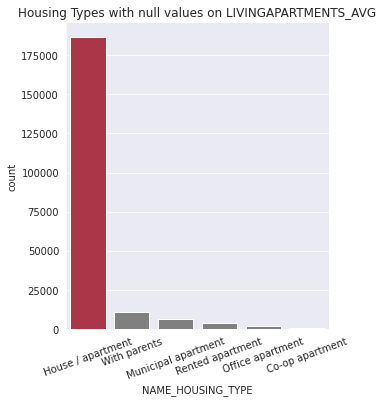

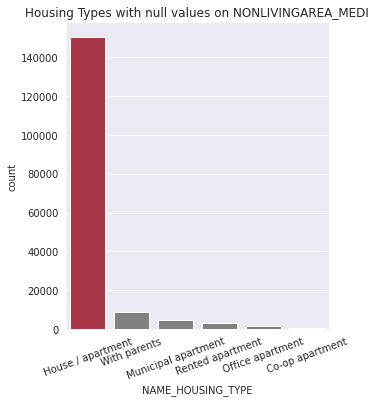

In [31]:
for i in ['APARTMENTS_AVG','LANDAREA_AVG','LIVINGAPARTMENTS_AVG','NONLIVINGAREA_MEDI']:
    temp=df_train[['NAME_HOUSING_TYPE']][df_train[i].isnull()]
    clrs = ['grey' if (x < max(df_train['NAME_HOUSING_TYPE'].value_counts())) else '#BE223A' for x in df_train['NAME_HOUSING_TYPE'].value_counts() ]
    sns.catplot(data=temp,x='NAME_HOUSING_TYPE',kind='count',palette=clrs, order =df_train['NAME_HOUSING_TYPE'].value_counts().index)
    plt.xticks(rotation=20)
    title = 'Housing Types with null values on ' + i
    plt.title(title)

Observations:
* Every unit/size-related field starting from 'APARTMENTS_AVG' till 'WALLSMATERIAL_MODE' are highly correlated with each other, with no value less than 0.7.
* I've plotted 4 sample features of these normalized information on where the customer lives, and it seems that the missing values are mostly coming from 'houses/apartments' -- take note, the 'rented' apartment is a different type (with it having a low count of missing values). Come to think of it, if we are living in a house for so long, we usually don't bother knowing its floor size or maybe we've forgotten about it - which is very much understandable. (unless you are going to renovate, rent-out or sell the place!) 
* The housing type that scored second highest with null values is 'with parents', and again it is common that someone living with parents won't actually bother knowing the land and floor area of their current residence. (from where I come from, this is usually the case)

Decisions:
* Since these are all residence-related sizes, I will consolidate them into one field to account for 'house expenditures'.

In [32]:
# CREATE NEW COLUMN : EXPENDITURE_HOUSE 
list_col_new_house = ['NAME_HOUSING_TYPE',
                    'APARTMENTS_AVG',
                    'BASEMENTAREA_AVG',
                    'YEARS_BEGINEXPLUATATION_AVG',
                    'YEARS_BUILD_AVG',
                    'COMMONAREA_AVG',
                    'ELEVATORS_AVG',
                    'ENTRANCES_AVG',
                    'FLOORSMAX_AVG',
                    'FLOORSMIN_AVG',
                    'LANDAREA_AVG',
                    'LIVINGAPARTMENTS_AVG',
                    'LIVINGAREA_AVG',
                    'NONLIVINGAPARTMENTS_AVG',
                    'NONLIVINGAREA_AVG',
                    'APARTMENTS_MODE',
                    'BASEMENTAREA_MODE',
                    'YEARS_BEGINEXPLUATATION_MODE',
                    'YEARS_BUILD_MODE',
                    'COMMONAREA_MODE',
                    'ELEVATORS_MODE',
                    'ENTRANCES_MODE',
                    'FLOORSMAX_MODE',
                    'FLOORSMIN_MODE',
                    'LANDAREA_MODE',
                    'LIVINGAPARTMENTS_MODE',
                    'LIVINGAREA_MODE',
                    'NONLIVINGAPARTMENTS_MODE',
                    'NONLIVINGAREA_MODE',
                    'APARTMENTS_MEDI',
                    'BASEMENTAREA_MEDI',
                    'YEARS_BEGINEXPLUATATION_MEDI',
                    'YEARS_BUILD_MEDI',
                    'COMMONAREA_MEDI',
                    'ELEVATORS_MEDI',
                    'ENTRANCES_MEDI',
                    'FLOORSMAX_MEDI',
                    'FLOORSMIN_MEDI',
                    'LANDAREA_MEDI',
                    'LIVINGAPARTMENTS_MEDI',
                    'LIVINGAREA_MEDI',
                    'NONLIVINGAPARTMENTS_MEDI',
                    'NONLIVINGAREA_MEDI',
                    'FONDKAPREMONT_MODE',
                    'HOUSETYPE_MODE',
                    'TOTALAREA_MODE',
                    'WALLSMATERIAL_MODE',
                    'EMERGENCYSTATE_MODE']

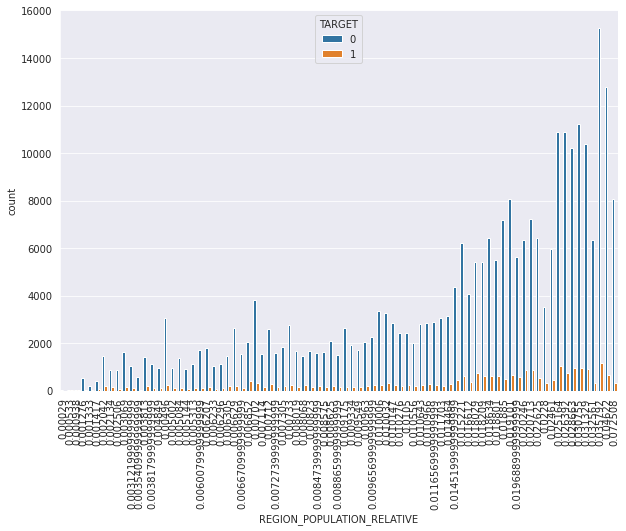

In [33]:
fig,ax = plt.subplots(figsize=(10,7))
sns.countplot(data=df_train,x='REGION_POPULATION_RELATIVE',hue='TARGET',ax=ax);
plt.xticks(rotation=90)
plt.show()

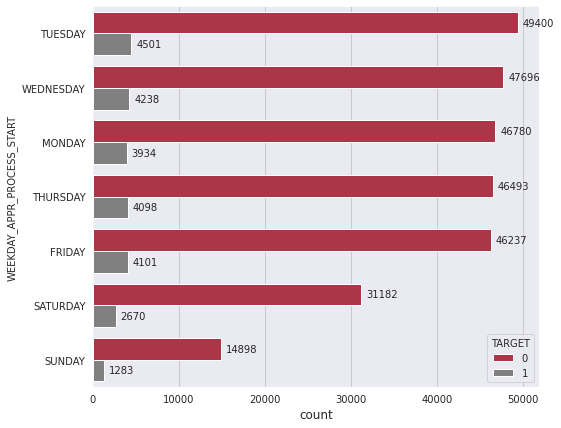

In [34]:
f, ax = plt.subplots(figsize=(8, 7))

clrs = ['grey' if (x < max(df_train['WEEKDAY_APPR_PROCESS_START'].value_counts())) else '#BE223A' for x in df_train['WEEKDAY_APPR_PROCESS_START'].value_counts() ]

sns.countplot(y="WEEKDAY_APPR_PROCESS_START", data=df_train, hue='TARGET',palette=clrs,order =df_train['WEEKDAY_APPR_PROCESS_START'].value_counts().index)

for p in ax.patches:  
  ax.annotate(p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
              xytext=(5, 0), textcoords='offset points', ha="left", va="center")

plt.grid(color='darkgray', axis='x', linestyle='-', linewidth=0.5)
plt.xlabel('count', fontsize=12)
plt.show()

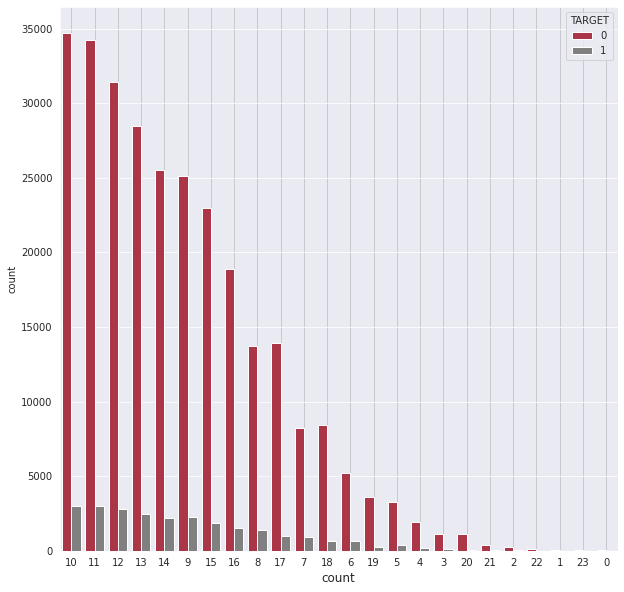

In [35]:
f, ax = plt.subplots(figsize=(10, 10))

clrs = ['grey' if (x < max(df_train['HOUR_APPR_PROCESS_START'].value_counts())) else '#BE223A' for x in df_train['HOUR_APPR_PROCESS_START'].value_counts() ]

sns.countplot(x="HOUR_APPR_PROCESS_START", data=df_train, hue='TARGET',palette=clrs,order =df_train['HOUR_APPR_PROCESS_START'].value_counts().index, ax=ax)
plt.grid(color='darkgray', axis='x', linestyle='-', linewidth=0.5)
plt.xlabel('count', fontsize=12)
plt.show()

Observations:
* REGION_POPULATION_RELATIVE has min val = 0.00029 and max val = 0.072508. Normalized values usually range from 0 to 1, but for this sample, the maximum value is way too far from 1. Whatever values this may serve, there is a noticeable number of defaults as the value gets higher. 
* Majority of the customers apply during weekdays, with a few on weekends. The trend on customers who weren't able to repay the loan is similar with that of those who did. 
* Suspiciously, there are people applying for a loan account as early as 3am, and it gets denser throughout the day. Do note that those who defaulted on their loan has a similar pattern with those having good records.

Decisions:
* Use REGION_POPULATION_RELATIVE as a feature model. The larger the population on a certain region, the more chances of getting a customer with a bad record.
* Drop WEEKDAY_APPR_PROCESS_START. I can't say that there's little chance of defaulting if the customer opens an account during Sundays, because the account opening overall on that day is relatively low compared to other days.
* Drop HOUR_APPR_PROCESS_START. Similar reasoning with above.

In [36]:
# COLUMNS TO BE DROPPED
list_col_drop.extend(['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   TARGET        307511 non-null  int64  
 1   EXT_SOURCE_1  134133 non-null  float64
 2   EXT_SOURCE_2  306851 non-null  float64
 3   EXT_SOURCE_3  246546 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 9.4 MB
None


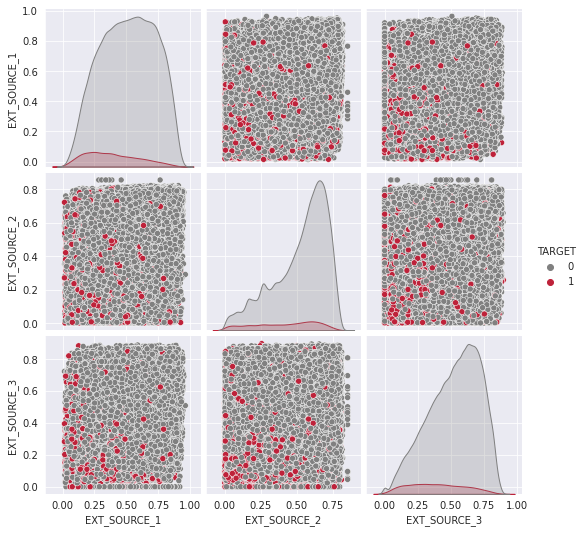

In [37]:
temp=df_train[['TARGET','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']]
print(temp.info())
sns.pairplot(temp,hue='TARGET',palette = ['grey','#BE223A']);

Observations: 
* These 3 fields are external data source score fields.
* Base on the plot above, those who were able to pay and did not pay can have scores fairly distributed on EXT_SOURCE fields, but it is quite evident that on the lower end of the normalized score mark (0.0-0.5), customers who paid (target=0, grey color) are much less prominent than those who didn't (target=1, red color)... and vice versa.
* All 3 fields have missing values.

Decisions:
* Use EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3 as model features. 
* Complete the fields by filling up the null values base on their mean EXT_SOURCE.

In [38]:
# COMPLETE COLUMNS : Base on mean EXT_SOURCE
list_col_fill_ext = ['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']

In [39]:
df_train[['AMT_INCOME_TOTAL','NAME_INCOME_TYPE','DAYS_EMPLOYED','OCCUPATION_TYPE','ORGANIZATION_TYPE']].describe(include='all')

AMT_INCOME_TOTAL NAME_INCOME_TYPE  DAYS_EMPLOYED OCCUPATION_TYPE  \
count       3.075110e+05           307511  307511.000000          211120   
unique               NaN                8            NaN              18   
top                  NaN          Working            NaN        Laborers   
freq                 NaN           158774            NaN           55186   
mean        1.687979e+05              NaN   63815.045904             NaN   
std         2.371231e+05              NaN  141275.766519             NaN   
min         2.565000e+04              NaN  -17912.000000             NaN   
25%         1.125000e+05              NaN   -2760.000000             NaN   
50%         1.471500e+05              NaN   -1213.000000             NaN   
75%         2.025000e+05              NaN    -289.000000             NaN   
max         1.170000e+08              NaN  365243.000000             NaN   

             ORGANIZATION_TYPE  
count                   307511  
unique                      58  
top     Business Entity Type 3  
freq                     67992  
mean                       NaN  
std                        NaN  
min                        NaN  
25%                        NaN  
50%                        NaN  
75%                        NaN  
max                        NaN

In [40]:
def get_thresh(df,field):
    """ Outliers are usually > 3 standard deviations away from the mean. """
    ave=np.mean(df[field])
    sdev=np.std(df[field])
    threshold=round(ave+(3*sdev),2)
    print('Threshold for',field,':',threshold)
    return threshold

In [41]:
thresh_income = get_thresh(df_train,'AMT_INCOME_TOTAL')
anomaly_emp = int(df_train['DAYS_EMPLOYED'][df_train['DAYS_EMPLOYED']>0].unique())
temp_orig=df_train[['AMT_INCOME_TOTAL','DAYS_EMPLOYED']]
temp_no_outliers=df_train[['AMT_INCOME_TOTAL','DAYS_EMPLOYED']][(df_train.AMT_INCOME_TOTAL<thresh_income)&(df_train['DAYS_EMPLOYED']<=0)]
print('Anomalous data for DAYS_EMPLOYED :',anomaly_emp)

Threshold for AMT_INCOME_TOTAL : 880166.2
Anomalous data for DAYS_EMPLOYED : 365243


In [42]:
def plotdist(df,f1,f2):
    f,axes = plt.subplots(1,2,figsize=(10,3))
    sns.distplot(df[[f1]],ax=axes[0]).set_title(f1)
    plt.xticks(rotation=75)

    sns.distplot(df[[f2]],ax=axes[1]).set_title(f2)
    plt.xticks(rotation=75)
    plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


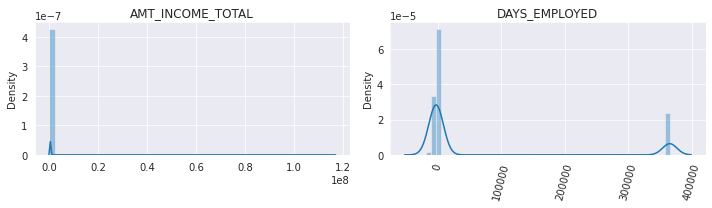

In [43]:
# AMT_INCOME_TOTAL, DAYS_EMPLOYED --> ORIGINAL VALUE WITH OUTLIERS
plotdist(temp_orig,'AMT_INCOME_TOTAL','DAYS_EMPLOYED')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


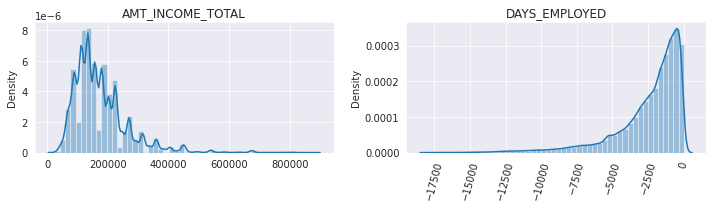

In [44]:
# AMT_INCOME_TOTAL, DAYS_EMPLOYED --> OUTLIERS REMOVED
plotdist(temp_no_outliers,'AMT_INCOME_TOTAL','DAYS_EMPLOYED')

In [45]:
# NUMBER OF INDIVIDUALS HAVING THE DAYS EMPLOYED ANOMALOUS DATA
len(df_train[df_train.DAYS_EMPLOYED==anomaly_emp])

55374

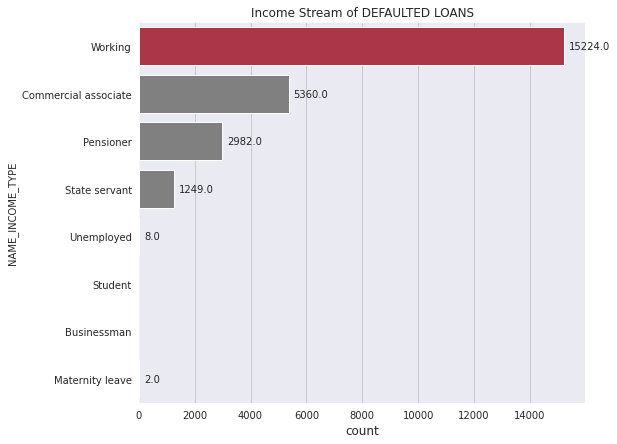

In [46]:
unpaid=df_train[df_train.TARGET==1]
f, ax = plt.subplots(figsize=(8, 7))

clrs = ['grey' if (x < max(df_train['NAME_INCOME_TYPE'].value_counts())) else '#BE223A' for x in df_train['NAME_INCOME_TYPE'].value_counts() ]

sns.countplot(y="NAME_INCOME_TYPE", data=unpaid,palette=clrs,order =df_train['NAME_INCOME_TYPE'].value_counts().index)

for p in ax.patches:  
  ax.annotate(p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
              xytext=(5, 0), textcoords='offset points', ha="left", va="center")

plt.grid(color='darkgray', axis='x', linestyle='-', linewidth=0.5)
plt.xlabel('count', fontsize=12)
plt.title('Income Stream of DEFAULTED LOANS');
plt.show()


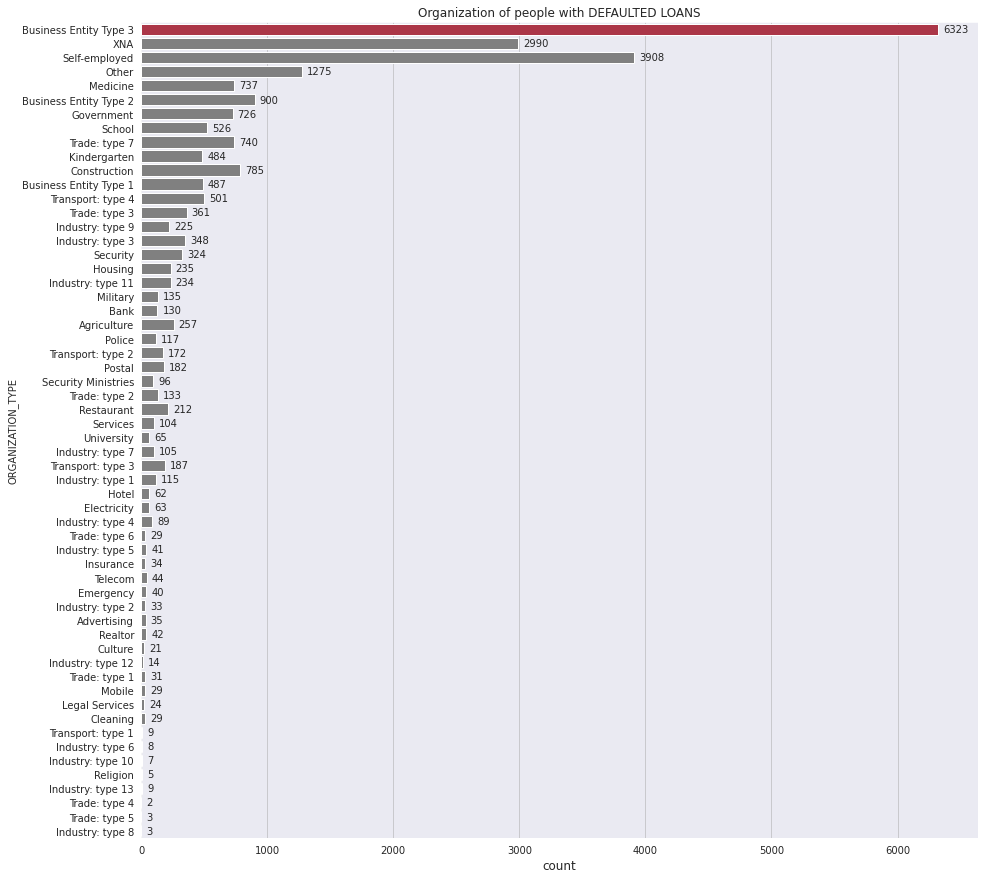

In [47]:
f, ax = plt.subplots(figsize=(15, 15))

clrs = ['grey' if (x < max(df_train['ORGANIZATION_TYPE'].value_counts())) else '#BE223A' for x in df_train['ORGANIZATION_TYPE'].value_counts() ]

sns.countplot(y="ORGANIZATION_TYPE", data=unpaid,palette=clrs,order =df_train['ORGANIZATION_TYPE'].value_counts().index)

for p in ax.patches:  
  ax.annotate(p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
              xytext=(5, 0), textcoords='offset points', ha="left", va="center")

plt.grid(color='darkgray', axis='x', linestyle='-', linewidth=0.5)
plt.xlabel('count', fontsize=12)
plt.title('Organization of people with DEFAULTED LOANS')
plt.show()

In [48]:
def plotstrip(df,xval,yval,hueval,yfig):
    fig,ax = plt.subplots(figsize=(15,yfig))
    sns.stripplot(x=xval,y=yval,hue=hueval,data=df,alpha=0.5,jitter=0.8,dodge=True,ax=ax,palette = ['grey','#BE223A']).set_title(yval);
    plt.legend(bbox_to_anchor=(1.05, 1))
    plt.show()

In [49]:
temp=df_train[df_train.OCCUPATION_TYPE.isnull()]
print('Individuals that left OCCUPATION_TYPE field blank:')
print(temp.NAME_INCOME_TYPE.value_counts())

Individuals that left OCCUPATION_TYPE field blank:
Pensioner               55357
Working                 24920
Commercial associate    12297
State servant            3787
Unemployed                 22
Student                     5
Businessman                 2
Maternity leave             1
Name: NAME_INCOME_TYPE, dtype: int64


In [50]:
print('Individuals that left ORGANIZATION_TYPE field blank (Top 10 only):')
print(temp.ORGANIZATION_TYPE.value_counts().head(10))

Individuals that left ORGANIZATION_TYPE field blank (Top 10 only):
XNA                       55372
Business Entity Type 3    14337
Other                      5192
Self-employed              3545
Business Entity Type 2     2265
Government                 2083
School                     1443
Business Entity Type 1     1310
Medicine                   1073
Transport: type 4           935
Name: ORGANIZATION_TYPE, dtype: int64


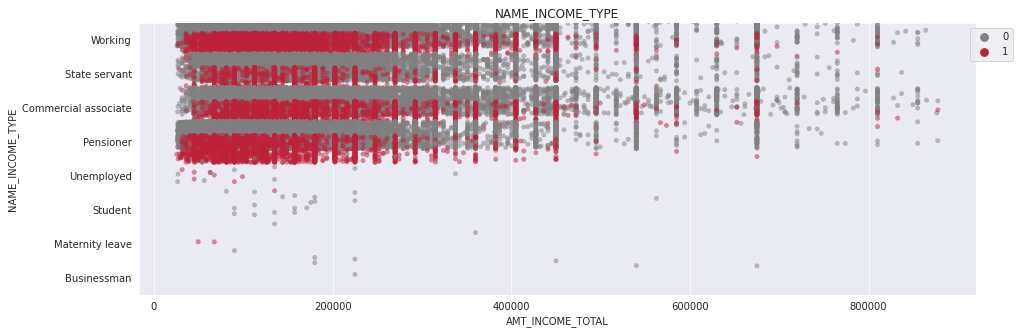

In [51]:
plotstrip(df_train[df_train.AMT_INCOME_TOTAL<thresh_income],'AMT_INCOME_TOTAL','NAME_INCOME_TYPE','TARGET',5)

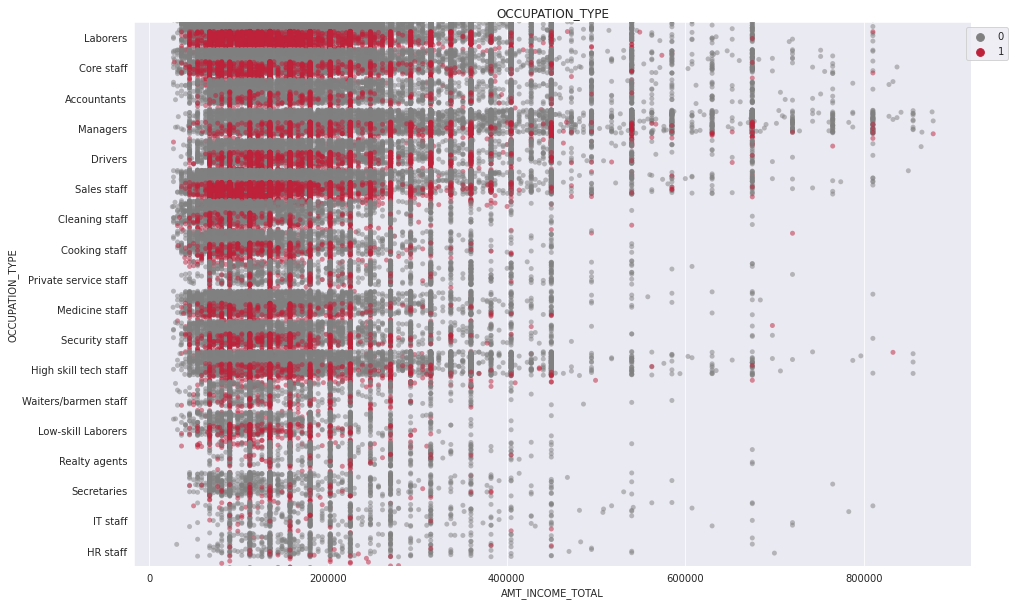

In [52]:
plotstrip(df_train[df_train.AMT_INCOME_TOTAL<thresh_income],'AMT_INCOME_TOTAL','OCCUPATION_TYPE','TARGET',10)

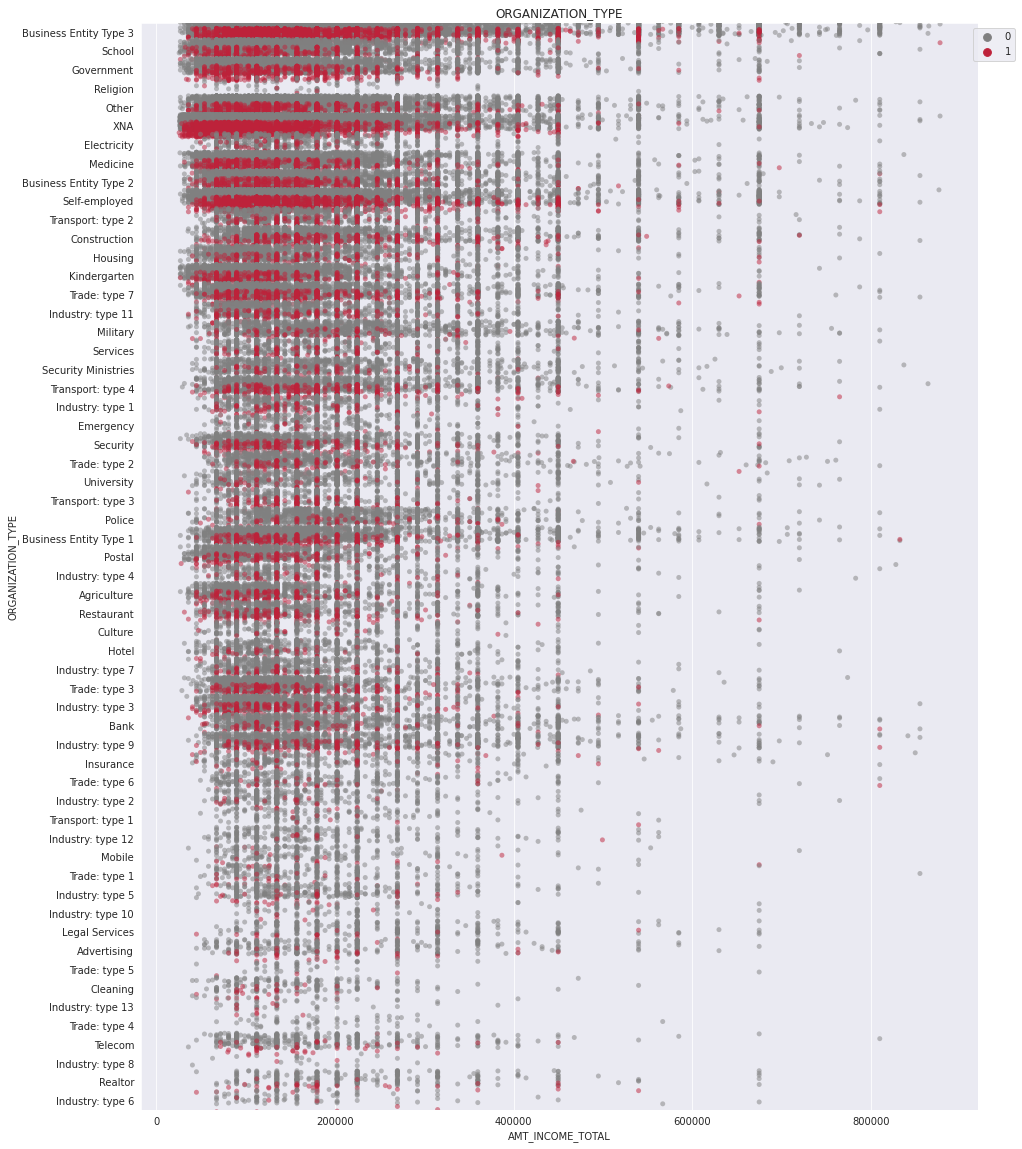

In [53]:
plotstrip(df_train[df_train.AMT_INCOME_TOTAL<thresh_income],'AMT_INCOME_TOTAL','ORGANIZATION_TYPE','TARGET',20)

Observations:
* AMT_INCOME_TOTAL has an outlier. As per the data: the 75th percentile is equal to 202,500, while the maximum value is equal to a whopping 117,000,000; It is quite a big difference as it means that **75% of our customers** are already making a total income of **202,500 or below** - the remaining 25% has a total income higher than 202,500.
* AMT_INCOME_TOTAL has a wide range of values, from min val 25,650 to max val 117,000,000.
* DAYS_EMPLOYED is having inconsistent data. It contains negative values (since it is in the form of 'days' relative to the application), then suddenly there is one very big positive number (365243 days - which equates to 1000 years!) with a significant number of individuals having it.
* NAME_INCOME_TYPE: The 'working' category is the most dense in terms of low wage high default customers. We also have very few samples on 'unemployed', 'student', 'maternity leave' and 'businessman'. Interesting to see that the 'businessman' category has an above average total income and has a high chance that they will maintain good credit scoring.
* NAME_INCOME_TYPE 'Pensioner' is almost equal to the DAYS_EMPLOYED anomaly data count! And it is also almost equal to the ORGANIZATION_TYPE value 'XNA' ! It just means that the '1000 years' employment duration was made for retired people.
* OCCUPATION_TYPE has 31% of its values missing. Majority of the null OCCUPATION_TYPE are from pensioners (which totally makes sense), then other big chunks are from working people, commercial associate, state servant, etc. My take here is that the choices on occupation type field is limited which led these number of working people to leaving it blank.
* The ORGANIZATION_TYPE is pretty diverse regarding where do these customers work. But base on the histogram, the category where the defaulting individuals are dominant are those in Business Entity Type 3, self-employed, and XNA.

Decisions:
* AMT_INCOME_TOTAL: Create new feature 'IncomeBand' to convert into ordinal income band category.
* DAYS_EMPLOYED: Convert anomalous data 365243 days to -29200 days (equal to 80 yrs). I think it's safe to say that an individual is retired by then after working for 80 yrs. Create new feature 'years employed' to convert number of employed 'days' to 'years' for easier reading.
* OCCUPATION_TYPE: to drop. We can leverage on how much is their total stream of income and how they acquire it.
* NAME_INCOME_TYPE: to drop. We can usually identify if someone is working, or a student, or already retired, etc., base on the age and ORGANIZATION_TYPE.
* ORGANIZATION_TYPE: Convert categorical text to numerical. Use feature for modeling.

In [54]:
# COLUMNS TO BE DROPPED
list_col_drop.extend(['OCCUPATION_TYPE','NAME_INCOME_TYPE'])

# CREATE NEW COLUMN : INCOME_BAND
list_col_new_income = ['AMT_INCOME_TOTAL'] 

# CONVERT COLUMN : 365243 to -29200 
list_col_conv_daysemp = ['DAYS_EMPLOYED']

# CREATE NEW COLUMN : YEARS_EMPLOYED
list_col_new_yrsemp = ['DAYS_EMPLOYED']

# CONVERT COLUMN : 
list_col_conv_org = ['ORGANIZATION_TYPE'] 

And for the final set of variables, I tagged it as 'trustworthiness' to account for trusthworthy credentials, or environmental/ unconsious factors that may shape an individual's behavior. It is quite a lot, so let's break it down again per function. (Note: the excel sheet above is incomplete as this notebook keeps crashing whenever I paste the remaining fields)

In [55]:
df_train[['CODE_GENDER','NAME_TYPE_SUITE','NAME_EDUCATION_TYPE','DAYS_REGISTRATION','DAYS_ID_PUBLISH']].describe(include='all')

CODE_GENDER NAME_TYPE_SUITE            NAME_EDUCATION_TYPE  \
count       307511          306219                         307511   
unique           3               7                              5   
top              F   Unaccompanied  Secondary / secondary special   
freq        202448          248526                         218391   
mean           NaN             NaN                            NaN   
std            NaN             NaN                            NaN   
min            NaN             NaN                            NaN   
25%            NaN             NaN                            NaN   
50%            NaN             NaN                            NaN   
75%            NaN             NaN                            NaN   
max            NaN             NaN                            NaN   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  
count       307511.000000    307511.000000  
unique                NaN              NaN  
top                   NaN              NaN  
freq                  NaN              NaN  
mean         -4986.120328     -2994.202373  
std           3522.886321      1509.450419  
min         -24672.000000     -7197.000000  
25%          -7479.500000     -4299.000000  
50%          -4504.000000     -3254.000000  
75%          -2010.000000     -1720.000000  
max              0.000000         0.000000

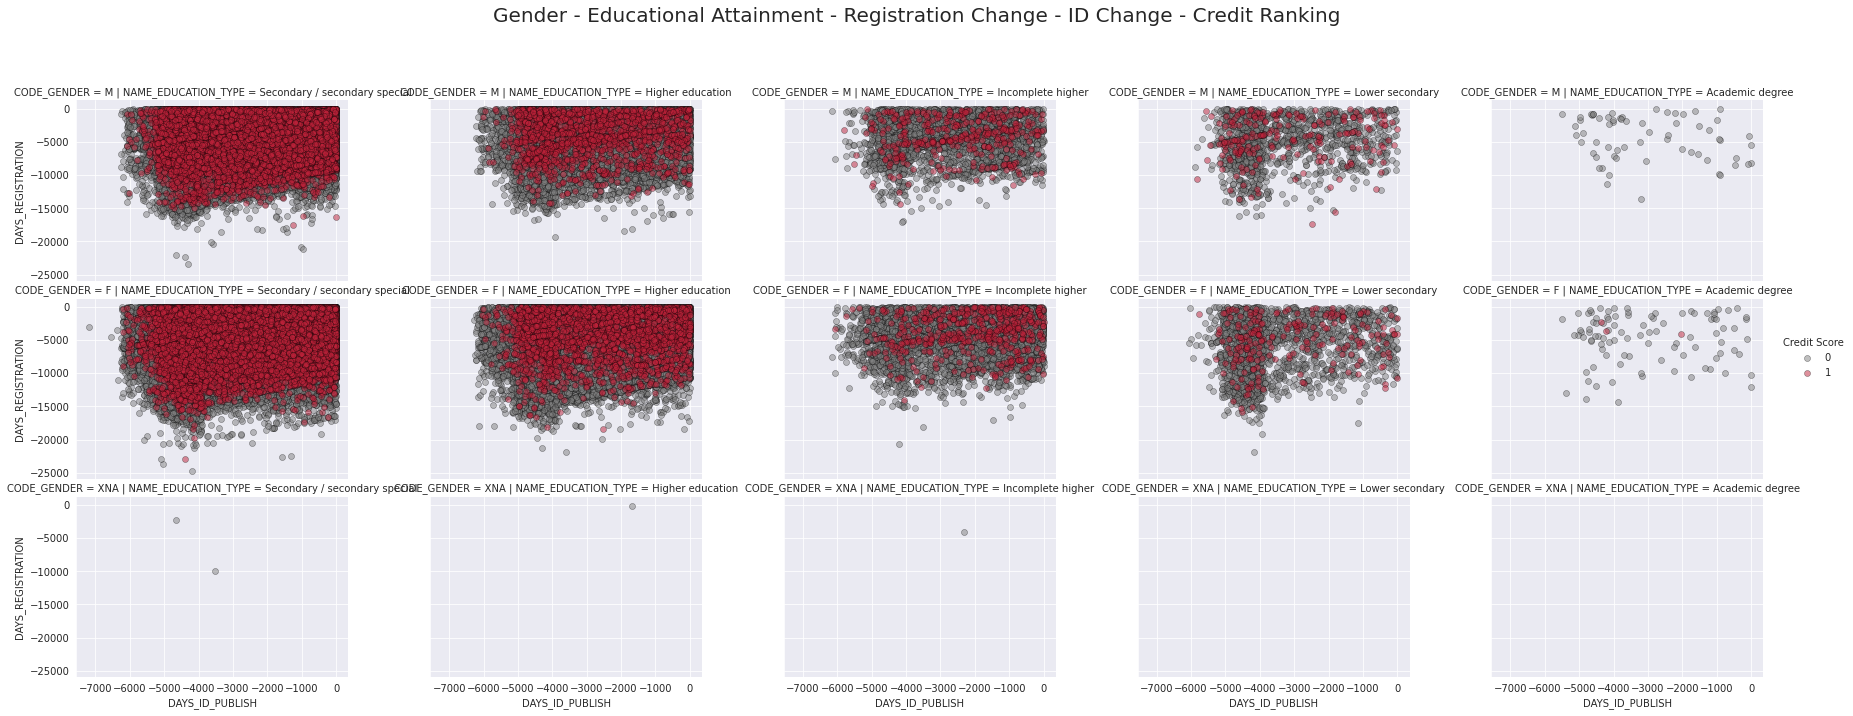

In [56]:
g = sns.FacetGrid(df_train,row='CODE_GENDER',col='NAME_EDUCATION_TYPE',hue='TARGET',height=4,palette = ['grey','#BE223A']) # nominal
g.map(plt.scatter,'DAYS_ID_PUBLISH','DAYS_REGISTRATION',alpha=0.5,edgecolor='k',linewidth=0.5,) # continuous

fig = g.fig 
fig.set_size_inches(25,10)
fig.subplots_adjust(top=0.85,wspace=0.3)
fig.suptitle('Gender - Educational Attainment - Registration Change - ID Change - Credit Ranking',fontsize=20)

l = g.add_legend(title='Credit Score')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Se

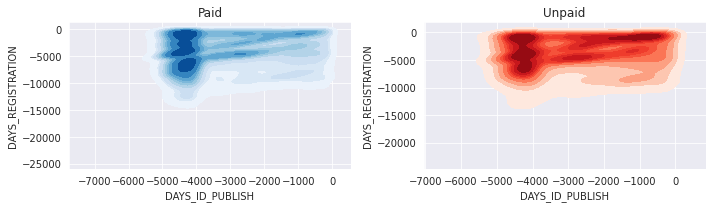

In [57]:
paid = df_train[df_train.TARGET==0]
unpaid = df_train[df_train.TARGET==1]

f,axes = plt.subplots(1,2,figsize=(10,3))
sns.kdeplot(paid['DAYS_ID_PUBLISH'],paid['DAYS_REGISTRATION'],cmap="Blues",shade=True,shade_lowest=False,ax=axes[0]).set_title('Paid');
sns.kdeplot(unpaid['DAYS_ID_PUBLISH'],unpaid['DAYS_REGISTRATION'],cmap="Reds",shade=True,shade_lowest=False,ax=axes[1]).set_title('Unpaid');
sns.set_style('whitegrid')
plt.tight_layout()

In [58]:
df_train.NAME_EDUCATION_TYPE.value_counts()

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


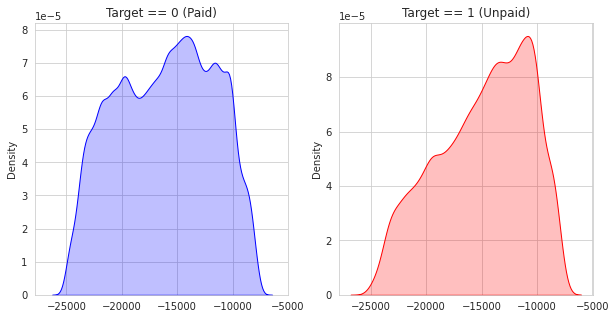

In [59]:
f,axes = plt.subplots(1,2,figsize=(10,5),sharex=True)
sns.distplot(df_train[['DAYS_BIRTH']][df_train.TARGET==0],hist=False,color="b",kde_kws={"shade":True},ax=axes[0]).set_title('Target == 0 (Paid)');
sns.distplot(df_train[['DAYS_BIRTH']][df_train.TARGET==1],hist=False,color="r",kde_kws={"shade":True},ax=axes[1]).set_title('Target == 1 (Unpaid)');

Observations:
* We have 3 types of CODE_GENDER in our sample: Male, female and XNA. Male and female customers are pretty dense, both having same chances of defaulting relative to their total count. We have a very small set of XNA (non-binary?) people, and base on our sample, 100% of them have good credit record.
* For NAME_EDUCATION_TYPE, majority of our customers - whether male, female, or XNA - are having 'secondary special' or 'higher education', and most of the defaulting customers came from this educational background. 'Incomplete higher' and 'Lower secondary' are lesser with also less defaulting customers. And the least count are those with 'Academic degree' which got the least number of unpaid customers.
* The number of days in which the customer changed his/her identity document and/or application registration seemed to have the same pattern for those having good credit and bad credit. 
* The DAYS_BIRTH of a customer (or rather the 'age') seem as expected. We can note that the x-axis values are negative - because it is recorded relative prior to the loan application - and very high (because it is in 'days' format rather than in 'years'). As per the graph, younger people tend to default more. As people gets older, they seem to be able to have a higher chance of paying off the loan.

Decisions:
* Use CODE_GENDER as a model feature. Convert the categorical text to numeric.
* Use NAME_EDUCATION_TYPE as a model feature. Convert the categorical text to numeric.
* Drop DAYS_REGISTRATION, DAYS_ID_PUBLISH, NAME_TYPE_SUITE. I generated a KDE plot and I hardly see the difference.
* Create new feature 'age' from DAYS_BIRTH. Compute for the age in years rather than using the day count.

In [60]:
# COLUMNS TO BE DROPPED
list_col_drop.extend(['NAME_TYPE_SUITE','DAYS_REGISTRATION','DAYS_ID_PUBLISH'])

# CONVERT COLUMN : 
list_col_conv_gender = ['CODE_GENDER']

# CONVERT COLUMN :
list_col_conv_edu = ['NAME_EDUCATION_TYPE']

# CREATE NEW COLUMN : AGE
list_col_new_age = ['DAYS_BIRTH']


In [61]:
temp1=['FLAG_MOBIL',
'FLAG_EMP_PHONE',
'FLAG_WORK_PHONE',
'FLAG_CONT_MOBILE',
'FLAG_PHONE',
'FLAG_EMAIL']

temp2=['FLAG_DOCUMENT_2',
'FLAG_DOCUMENT_3',
'FLAG_DOCUMENT_4',
'FLAG_DOCUMENT_5',
'FLAG_DOCUMENT_6',
'FLAG_DOCUMENT_7',
'FLAG_DOCUMENT_8',
'FLAG_DOCUMENT_9',
'FLAG_DOCUMENT_10',
'FLAG_DOCUMENT_11',
'FLAG_DOCUMENT_12',
'FLAG_DOCUMENT_13',
'FLAG_DOCUMENT_14',
'FLAG_DOCUMENT_15',
'FLAG_DOCUMENT_16',
'FLAG_DOCUMENT_17',
'FLAG_DOCUMENT_18',
'FLAG_DOCUMENT_19',
'FLAG_DOCUMENT_20',
'FLAG_DOCUMENT_21']

In [62]:
df_train[temp1+temp2].describe()

FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  \
count  307511.000000   307511.000000    307511.000000     307511.000000   
mean        0.999997        0.819889         0.199368          0.998133   
std         0.001803        0.384280         0.399526          0.043164   
min         0.000000        0.000000         0.000000          0.000000   
25%         1.000000        1.000000         0.000000          1.000000   
50%         1.000000        1.000000         0.000000          1.000000   
75%         1.000000        1.000000         0.000000          1.000000   
max         1.000000        1.000000         1.000000          1.000000   

          FLAG_PHONE     FLAG_EMAIL  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  \
count  307511.000000  307511.000000    307511.000000    307511.000000   
mean        0.281066       0.056720         0.000042         0.710023   
std         0.449521       0.231307         0.006502         0.453752   
min         0.000000       0.000000         0.000000         0.000000   
25%         0.000000       0.000000         0.000000         0.000000   
50%         0.000000       0.000000         0.000000         1.000000   
75%         1.000000       0.000000         0.000000         1.000000   
max         1.000000       1.000000         1.000000         1.000000   

       FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  ...  FLAG_DOCUMENT_12  \
count    307511.000000    307511.000000  ...     307511.000000   
mean          0.000081         0.015115  ...          0.000007   
std           0.009016         0.122010  ...          0.002550   
min           0.000000         0.000000  ...          0.000000   
25%           0.000000         0.000000  ...          0.000000   
50%           0.000000         0.000000  ...          0.000000   
75%           0.000000         0.000000  ...          0.000000   
max           1.000000         1.000000  ...          1.000000   

       FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  \
count     307511.000000     307511.000000      307511.00000     307511.000000   
mean           0.003525          0.002936           0.00121          0.009928   
std            0.059268          0.054110           0.03476          0.099144   
min            0.000000          0.000000           0.00000          0.000000   
25%            0.000000          0.000000           0.00000          0.000000   
50%            0.000000          0.000000           0.00000          0.000000   
75%            0.000000          0.000000           0.00000          0.000000   
max            1.000000          1.000000           1.00000          1.000000   

       FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.000267          0.008130          0.000595          0.000507   
std            0.016327          0.089798          0.024387          0.022518   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       FLAG_DOCUMENT_21  
count     307511.000000  
mean           0.000335  
std            0.018299  
min            0.000000  
25%            0.000000  
50%            0.000000  
75%            0.000000  
max            1.000000  

[8 rows x 26 columns]

In [63]:
def featsum(cols,newcol):
    """ Sums up items per row across all columns.
        Returns df with new sum column and catplot.
    """
    sample_count=df_train[cols].sum(axis=1)
    sample = df_train.copy()
    sample[newcol]=sample_count
    sns.catplot(data=sample,x=newcol,hue='TARGET',kind='count',palette = ['grey','#BE223A'],order =sample[newcol].value_counts().index);

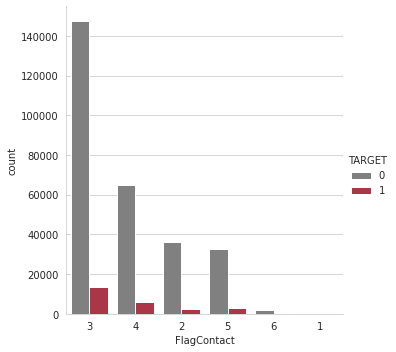

In [64]:
featsum(temp1,'FlagContact')

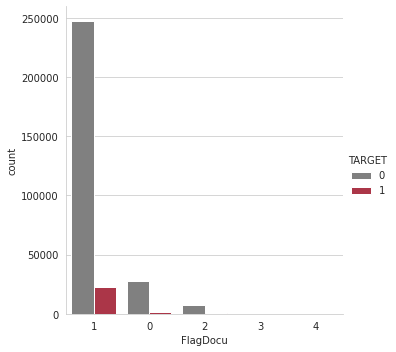

In [65]:
featsum(temp2,'FlagDocu')

Observations:
* All 26 'FLAG-' (flag for contacts and documents) variables have nominal categorical values: 1='YES', 0='NO'. 

Decisions:
* Create new feature 'FlagContact' to account for the total flag-contact variable recorded per individual. 
* Create new feature 'FlagDocu' to account for the total flag-document variable recorded per individual.

In [66]:
# CREATE NEW COLUMN : FLAG_CONTACTS
list_col_new_flagCont = [ 
    'FLAG_MOBIL',
    'FLAG_EMP_PHONE',
    'FLAG_WORK_PHONE',
    'FLAG_CONT_MOBILE',
    'FLAG_PHONE',
    'FLAG_EMAIL']

# CREATE NEW COLUMN : FLAG_DOCS
list_col_new_flagDoc = [ 
    'FLAG_DOCUMENT_2',
    'FLAG_DOCUMENT_3',
    'FLAG_DOCUMENT_4',
    'FLAG_DOCUMENT_5',
    'FLAG_DOCUMENT_6',
    'FLAG_DOCUMENT_7',
    'FLAG_DOCUMENT_8',
    'FLAG_DOCUMENT_9',
    'FLAG_DOCUMENT_10',
    'FLAG_DOCUMENT_11',
    'FLAG_DOCUMENT_12',
    'FLAG_DOCUMENT_13',
    'FLAG_DOCUMENT_14',
    'FLAG_DOCUMENT_15',
    'FLAG_DOCUMENT_16',
    'FLAG_DOCUMENT_17',
    'FLAG_DOCUMENT_18',
    'FLAG_DOCUMENT_19',
    'FLAG_DOCUMENT_20',
    'FLAG_DOCUMENT_21']

In [67]:
def plotcat(x,r):
    sns.catplot(data=df_train,x=x,hue='TARGET',kind='count',palette = ['grey','#BE223A'],order =df_train[x].value_counts().index);
    plt.xticks(rotation=r);

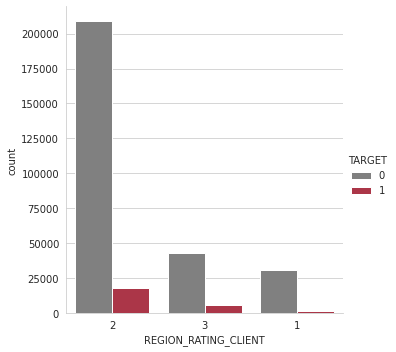

In [68]:
plotcat('REGION_RATING_CLIENT',0)

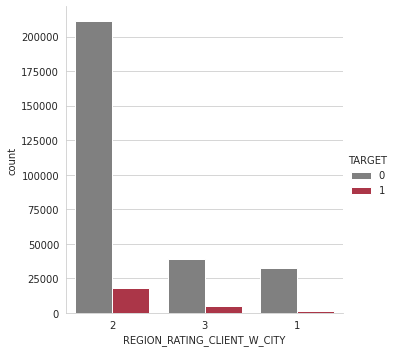

In [69]:
plotcat('REGION_RATING_CLIENT_W_CITY',0)

In [70]:
print('Correlation:',round(df_train['REGION_RATING_CLIENT_W_CITY'].corr(df_train['REGION_RATING_CLIENT']),2))

Correlation: 0.95


In [71]:
temp=[
    'REG_REGION_NOT_LIVE_REGION',
    'LIVE_REGION_NOT_WORK_REGION',
    'REG_CITY_NOT_LIVE_CITY',
    'LIVE_CITY_NOT_WORK_CITY'
]

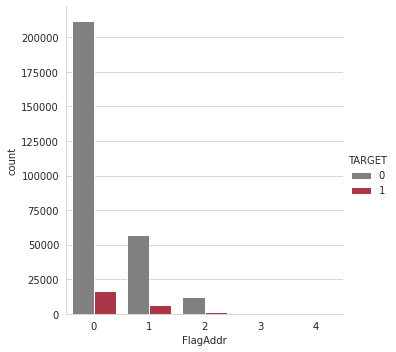

In [72]:
featsum(temp,'FlagAddr')

Observations:
* REGION_RATING_CLIENT & REGION_RATING_CLIENT_W_CITY is highly correlated, scoring 0.95. This is Home Credit's rating of the region where client lives (values = 1,2,3). Majority of the sample obtains a value of '2', and the defaulting count is visible 
* The 4 fields related to flags if the customer's certain (registered) address does not match another given address, the values being: 0='SAME', 1='DIFFERENT'. Most of the customers registered their addresses accurately (scoring 0). And since '0' has a very high frequency, there is a greater chance of encountering different kinds of people that may default on their loan. 

Decisions:
* Use REGION_RATING_CLIENT as a feature model.
* Drop REGION_RATING_CLIENT_W_CITY since it is highly correlated to region rating alone.
* Create new ordinal feature 'flag address' to indicate the sum of all 4 flag-address-related fields. The higher the score, the more inaccurate address declarations were made by the individual.


In [73]:
# COLUMNS TO BE DROPPED
list_col_drop.extend(['REGION_RATING_CLIENT_W_CITY'])

# CREATE NEW COLUMN : FLAG_ADDR
list_col_new_flagAddr = ['REG_REGION_NOT_LIVE_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','LIVE_CITY_NOT_WORK_CITY']

In [74]:
df_train[['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE']].describe()

OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
count             306490.000000             306490.000000   
mean                   1.422245                  0.143421   
std                    2.400989                  0.446698   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    2.000000                  0.000000   
max                  348.000000                 34.000000   

       OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
count             306490.000000             306490.000000   
mean                   1.405292                  0.100049   
std                    2.379803                  0.362291   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    2.000000                  0.000000   
max                  344.000000                 24.000000   

       DAYS_LAST_PHONE_CHANGE  
count           307510.000000  
mean              -962.858788  
std                826.808487  
min              -4292.000000  
25%              -1570.000000  
50%               -757.000000  
75%               -274.000000  
max                  0.000000

In [75]:
def featsumviolin(df,cols1,cols2,newcol1,newcol2):
    """ Sums up items per row across all columns.
        Returns df with new sum column and violinplot.
    """
    sample_count1=df[cols1].sum(axis=1)
    sample_count2=df[cols2].sum(axis=1)
    sample = df_train.copy()
    sample[newcol1]=sample_count1
    sample[newcol2]=sample_count2
    fig,ax = plt.subplots(figsize=(10,5))
    sns.violinplot(data=sample,hue='TARGET',x=newcol1,y=newcol2,split=True,inner='quart',linewidth=1.3,palette={1:"#BE223A", 0:"grey"});
 

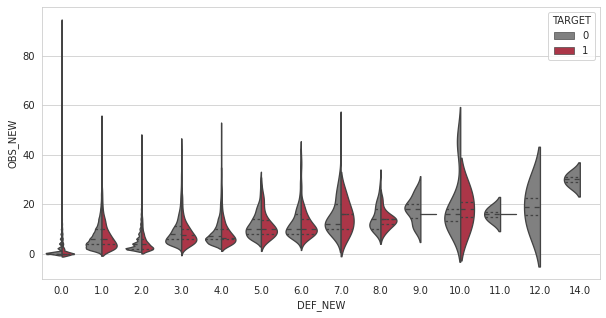

In [76]:
featsumviolin(df_train[(df_train.OBS_30_CNT_SOCIAL_CIRCLE<348)&(df_train.OBS_60_CNT_SOCIAL_CIRCLE<344)],
              ['DEF_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE'],
              ['OBS_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE'],
              'DEF_NEW','OBS_NEW')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

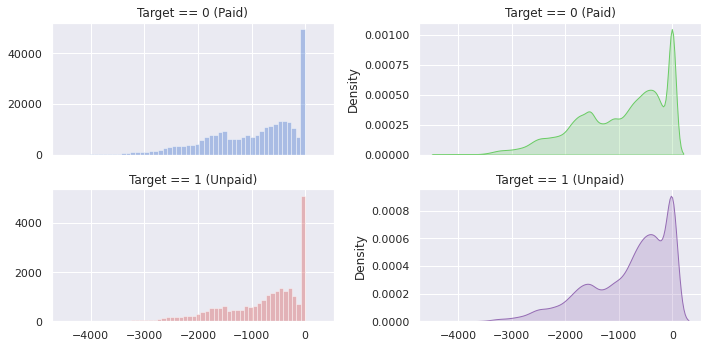

In [77]:
sns.set(palette="muted",color_codes=True)
f,axes = plt.subplots(2,2,figsize=(10,5),sharex=True)

sns.distplot(df_train[['DAYS_LAST_PHONE_CHANGE']][df_train.TARGET==0],kde=False,color="b",ax=axes[0,0]).set_title('Target == 0 (Paid)')
sns.distplot(df_train[['DAYS_LAST_PHONE_CHANGE']][df_train.TARGET==0],hist=False,color="g",kde_kws={"shade":True},ax=axes[0,1]).set_title('Target == 0 (Paid)')

sns.distplot(df_train[['DAYS_LAST_PHONE_CHANGE']][df_train.TARGET==1],kde=False,color="r",ax=axes[1,0]).set_title('Target == 1 (Unpaid)')
sns.distplot(df_train[['DAYS_LAST_PHONE_CHANGE']][df_train.TARGET==1],hist=False,color="m",kde_kws={"shade":True},ax=axes[1,1]).set_title('Target == 1 (Unpaid)')

plt.tight_layout()

Observations:
* There are 2 variables related to 30 days past due (30 DPD), and another 2 for 60 days past due (60 DPD). I have combined them and plotted using a violinplot as seen above. From what I understand here, those people that defaulted, and even those who didn't, have equal possibilities of missing a payment on their due date. Though surprisingly, majority of those who paid on a much later date got their loans cleared off.
> Note: A payment status of 30-days late means that payment is between 30-59 days past the payment due date (30 DPD). A payment status of 60-days late means that payment is between 60-89 days past the payment due date (60 DPD).
* I plotted separately the days in which a customer last changed their phone (relative to their application) for those having good and bad loan status records. The result is pretty much expected, as most people tend to change phones in a span of 2-3 years only (hence the distribution is skewed to the right). We can see that the people count gets lesser and lesser as the usage of their phone gets longer than the average.

Decisions:
* Drop the DPD variables.
* Drop DAYS_LAST_PHONE_CHANGE.

In [78]:
# COLUMNS TO BE DROPPED
list_col_drop.extend(['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE'])

And finally, for the last set of variables to be explored: Number of enquiries to Credit Bureau about the customer.

In [79]:
df_train[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].describe()

AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%                     0.000000                    0.000000  
50%                     0.000000                    1.000000  
75%                     0.000000                    3.000000  
max                   261.000000                   25.000000

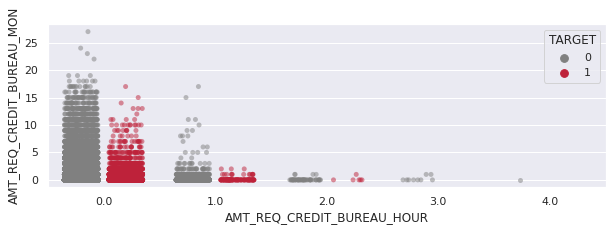

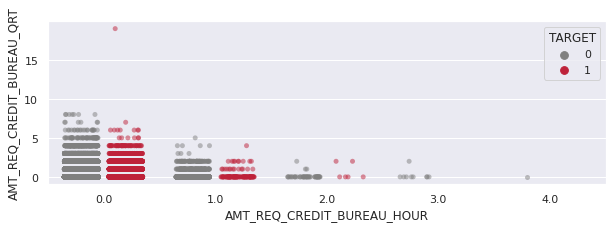

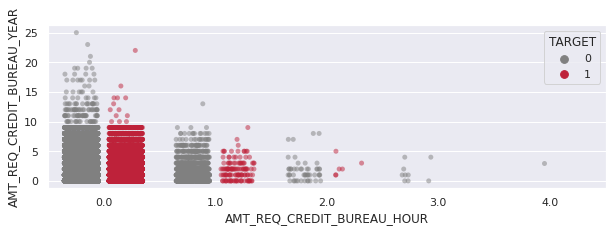

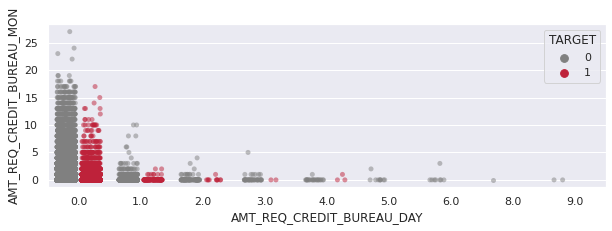

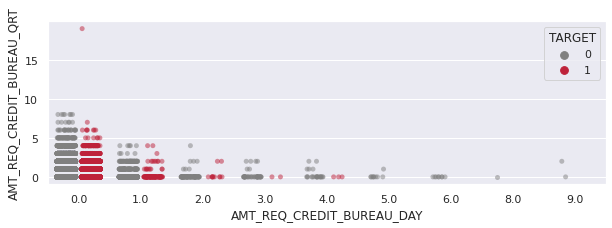

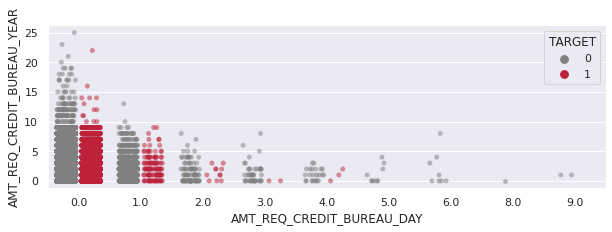

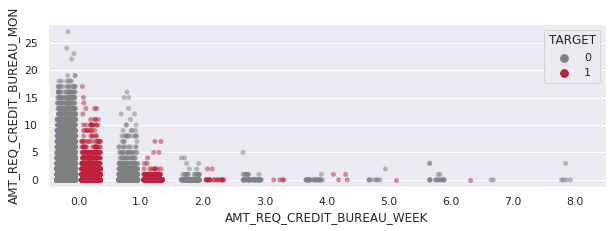

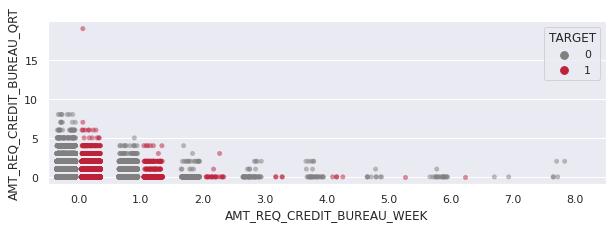

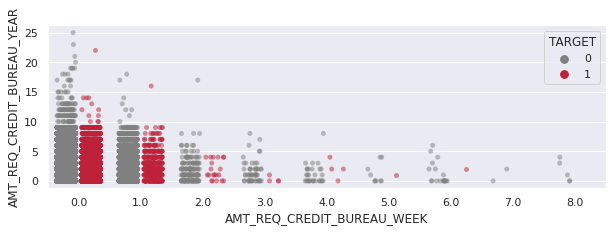

In [80]:
for i in ['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK']:
    for j in ['AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']:
        fig,ax = plt.subplots(figsize=(10,3))
        sns.stripplot(data=df_train[df_train.AMT_REQ_CREDIT_BUREAU_QRT<261],x=i,y=j,hue='TARGET',alpha=0.5,jitter=0.3,dodge=True,ax=ax,palette={1:"#BE223A", 0:"grey"})
        plt.show()

Observations:
* What I can see here is that, majority of the sample don't really have queries (0.0) regardless what time period it is, and regardless of their repayment status. The most common enquiry count ranges from 0 to 2, but then the behavior is similar to both TARGET==0 and TARGET==1. Do take note that we only have a few individuals (about 8%) in our sample population that defaulted (TARGET==1).

Decisions:
* Drop the credit bureau enquiry fields.

In [81]:
# COLUMNS TO BE DROPPED
list_col_drop.extend(['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
                      'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
                      'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR'])

<a id='wrangling'></a>
# Data Wrangling

After (finally) checking all our fields, it is time to proceed with data wrangling - also known as the data cleaning process.

Complete the null values of the following features:
* 'EXT_SOURCE_1'
* 'EXT_SOURCE_2'
* 'EXT_SOURCE_3'

In [82]:
def getmean(df,ls_cols):
    list_mean = []
    for i in ls_cols:
        mean_val = df[i].mean()
        list_mean.append(mean_val)
    return list_mean

def fill_ave_ext(df,ls_cols):  
    list_mean = getmean(df,ls_cols) # mean of EXT_SOURCE_*
    ctr=0
    for i in ls_cols:
        df[i] = df[i].fillna(list_mean[ctr])
        ctr+=1
    return df
        
# Fill in the training set
fill_ave_ext(df_train,list_col_fill_ext);

# Fill in the testing set
fill_ave_ext(df_test,list_col_fill_ext);

In [83]:
# NO MORE NULL VALUES FOR 'EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3'
print(df_train[list_col_fill_ext].info())
print(df_test[list_col_fill_ext].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   EXT_SOURCE_1  307511 non-null  float64
 1   EXT_SOURCE_2  307511 non-null  float64
 2   EXT_SOURCE_3  307511 non-null  float64
dtypes: float64(3)
memory usage: 7.0 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   EXT_SOURCE_1  48744 non-null  float64
 1   EXT_SOURCE_2  48744 non-null  float64
 2   EXT_SOURCE_3  48744 non-null  float64
dtypes: float64(3)
memory usage: 1.1 MB
None


Complete the null values for 'CNT_FAM_MEMBERS'.

In [84]:
def fill_0_fam(df,ls_cols):
    df[ls_cols] = df[ls_cols].fillna(0)
    return df
    
    
fill_0_fam(df_train,'CNT_FAM_MEMBERS');
fill_0_fam(df_test,'CNT_FAM_MEMBERS');

In [85]:
# NO MORE NULL VALUES FOR 'CNT_FAM_MEMBERS'
print(df_train[list_col_fill_fam].info())
print(df_test[list_col_fill_fam].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 1 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CNT_FAM_MEMBERS  307511 non-null  float64
dtypes: float64(1)
memory usage: 2.3 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CNT_FAM_MEMBERS  48744 non-null  float64
dtypes: float64(1)
memory usage: 380.9 KB
None


Convert the anomaly data in 'DAYS_EMPLOYED'.

In [86]:
# ANOMALY DATA COUNT BEFORE CONVERSION
print('Train set :',len(df_train[df_train.DAYS_EMPLOYED==365243]))
print('Test set  :',len(df_test[df_test.DAYS_EMPLOYED==365243]))

Train set : 55374
Test set  : 9274


In [87]:
def conv_daysemp(df,ls_cols):
    df[ls_cols[0]].replace(to_replace=365243,value=-29200,inplace=True)
    return df

In [88]:
conv_daysemp(df_train,list_col_conv_daysemp);
conv_daysemp(df_test,list_col_conv_daysemp);

In [89]:
# ANOMALY DATA COUNT AFTER CONVERSION
print('Train set :',len(df_train[df_train.DAYS_EMPLOYED==365243]))
print('Test set  :',len(df_test[df_test.DAYS_EMPLOYED==365243]))

Train set : 0
Test set  : 0


Convert the categorical text columns to numerical ones for:
* CODE_GENDER
* NAME_EDUCATION_TYPE
* ORGANIZATION_TYPE

In [90]:
# BEFORE CONVERSION
print(df_train[['CODE_GENDER','NAME_EDUCATION_TYPE','ORGANIZATION_TYPE']].head(3))
print(df_test[['CODE_GENDER','NAME_EDUCATION_TYPE','ORGANIZATION_TYPE']].head(3))

  CODE_GENDER            NAME_EDUCATION_TYPE       ORGANIZATION_TYPE
0           M  Secondary / secondary special  Business Entity Type 3
1           F               Higher education                  School
2           M  Secondary / secondary special              Government
  CODE_GENDER            NAME_EDUCATION_TYPE  ORGANIZATION_TYPE
0           F               Higher education       Kindergarten
1           M  Secondary / secondary special      Self-employed
2           M               Higher education  Transport: type 3


In [91]:
def conv_gender(df,ls_cols):
    df[ls_cols[0]] = df[ls_cols[0]].map({'XNA':0,'M':1,'F':2}).astype(int)
    return df

def conv_education(df,ls_cols):
    temp_dict = {
        'Lower secondary':1,
        'Secondary / secondary special':2,
        'Incomplete higher':3,
        'Higher education':4,
        'Academic degree':5
    }
    df[ls_cols[0]] = df[ls_cols[0]].map(temp_dict).astype(int)
    return df

def conv_org(df,ls_cols):
    ls_ctr=[i for i in np.arange(1,len(ls_cols)+1)]
    temp_dict = dict(zip(ls_cols,ls_ctr))
    df['ORGANIZATION_TYPE'] = df['ORGANIZATION_TYPE'].map(temp_dict).astype(int)
    return df

In [92]:
conv_gender(df_train,list_col_conv_gender);
conv_gender(df_test,list_col_conv_gender);

conv_education(df_train,list_col_conv_edu);
conv_education(df_test,list_col_conv_edu);

In [93]:
orgtype = sorted(df_train.ORGANIZATION_TYPE.unique())
conv_org(df_train,orgtype);
conv_org(df_test,orgtype);

In [94]:
# AFTER CONVERSION
print(df_train[['CODE_GENDER','NAME_EDUCATION_TYPE','ORGANIZATION_TYPE']].head(3))
print(df_test[['CODE_GENDER','NAME_EDUCATION_TYPE','ORGANIZATION_TYPE']].head(3))

   CODE_GENDER  NAME_EDUCATION_TYPE  ORGANIZATION_TYPE
0            1                    2                  6
1            2                    4                 40
2            1                    2                 12
   CODE_GENDER  NAME_EDUCATION_TYPE  ORGANIZATION_TYPE
0            2                    4                 29
1            1                    2                 43
2            1                    4                 55


<a id='engineering'></a>
# Feature Engineering

Only few variables were processed at the data wrangling phase, mainly because most of it will be *engineered* to create new features from existing ones. Hopefully, this will improve the model performance. Let's start.


***On a side note, I've dropped some of the features that I previously considered due to my limited experience in feature engineering. I'd probably revisit this notebook in the future to further improve.***

In [95]:
# CREATE NEW COLUMN : 0 - none, 1 - with car no realty, 2 - no car with realty, 3 - with car with realty
list_col_new_asset

['FLAG_OWN_CAR', 'FLAG_OWN_REALTY']

In [96]:
def create_asset(df):
    df['FLAG_ASSET'] = np.nan
    filter_0 = (df.FLAG_OWN_CAR=='N')&(df.FLAG_OWN_REALTY=='N')
    filter_1 = (df.FLAG_OWN_CAR=='Y')&(df.FLAG_OWN_REALTY=='N')
    filter_2 = (df.FLAG_OWN_CAR=='N')&(df.FLAG_OWN_REALTY=='Y')
    filter_3 = (df.FLAG_OWN_CAR=='Y')&(df.FLAG_OWN_REALTY=='Y')
    
    df['FLAG_ASSET'][filter_0] = 0
    df['FLAG_ASSET'][filter_1] = 1
    df['FLAG_ASSET'][filter_2] = 2
    df['FLAG_ASSET'][filter_3] = 3
    return df

    
create_asset(df_train);
create_asset(df_test);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dis

In [97]:
# SAMPLE OUTPUT
df_test[['FLAG_OWN_CAR','FLAG_OWN_REALTY','FLAG_ASSET']].head()

FLAG_OWN_CAR FLAG_OWN_REALTY  FLAG_ASSET
0            N               Y         2.0
1            N               Y         2.0
2            Y               Y         3.0
3            N               Y         2.0
4            Y               N         1.0

In [98]:
# SINCE WE NOW HAVE AN ASSET INDICATOR, WE CAN NOW REMOVE list_col_new_asset 
list_col_drop.extend(list_col_new_asset)

In [99]:
# CREATE NEW COLUMN : FLAG_CONTACTS
list_col_new_flagCont

['FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL']

In [100]:
def create_sum_cols(df,ls_cols,newcol):
    df[newcol] = np.nan
    ls_sum_value = df[ls_cols].sum(axis=1)
    df[newcol] = ls_sum_value
    return df

In [101]:
create_sum_cols(df_train,list_col_new_flagCont,'FLAG_CONTACTS');
create_sum_cols(df_test,list_col_new_flagCont,'FLAG_CONTACTS');

In [102]:
df_test[['FLAG_CONTACTS']].head()

FLAG_CONTACTS
0              4
1              3
2              3
3              4
4              4

In [103]:
# CREATE NEW COLUMN : FLAG_DOCS
list_col_new_flagDoc

['FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [104]:
create_sum_cols(df_train,list_col_new_flagDoc,'FLAG_DOCS');
create_sum_cols(df_test,list_col_new_flagDoc,'FLAG_DOCS');

In [105]:
df_test[['FLAG_DOCS']].head()

FLAG_DOCS
0          1
1          1
2          1
3          1
4          1

In [106]:
# CREATE NEW COLUMN : FLAG_ADDR
list_col_new_flagAddr

['REG_REGION_NOT_LIVE_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'LIVE_CITY_NOT_WORK_CITY']

In [107]:
create_sum_cols(df_train,list_col_new_flagAddr,'FLAG_ADDR');
create_sum_cols(df_test,list_col_new_flagAddr,'FLAG_ADDR');

In [108]:
df_test[['FLAG_ADDR']].head()

FLAG_ADDR
0          0
1          0
2          0
3          0
4          1

In [109]:
# SINCE WE NOW HAVE FLAG COMPLIANCE FIELDS, WE CAN NOW REMOVE EXISTING COLUMNS 
list_col_drop.extend(list_col_new_flagCont)
list_col_drop.extend(list_col_new_flagDoc)
list_col_drop.extend(list_col_new_flagAddr)

In [110]:
# CREATE NEW COLUMN : AGE
list_col_new_age 

['DAYS_BIRTH']

In [111]:
def create_day_to_year(df,ls_cols,newcol):
    df[newcol] = round(np.abs(df[ls_cols[0]]/365))
    return df

In [112]:
create_day_to_year(df_train,list_col_new_age,'AGE');
create_day_to_year(df_test,list_col_new_age,'AGE');

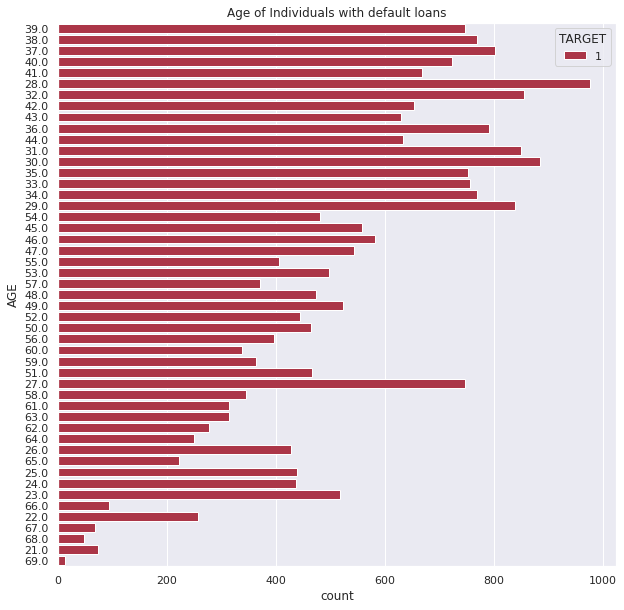

In [113]:
f,ax=plt.subplots(figsize=(10,10))
sns.countplot(data=df_train[df_train.TARGET==1],y='AGE',hue='TARGET',
              palette = ["#BE223A"],
              order=df_train['AGE'].value_counts().index)
plt.title('Age of Individuals with default loans')
plt.show()

In [114]:
# CREATE NEW COLUMN : YEARS_EMPLOYED
list_col_new_yrsemp

['DAYS_EMPLOYED']

In [115]:
create_day_to_year(df_train,list_col_new_yrsemp,'YEARS_EMPLOYED');
create_day_to_year(df_test,list_col_new_yrsemp,'YEARS_EMPLOYED');

In [116]:
df_test[['YEARS_EMPLOYED']].head()

YEARS_EMPLOYED
0             6.0
1            12.0
2            12.0
3             5.0
4             6.0

In [117]:
# SINCE WE NOW HAVE NEW FEATURES, WE CAN NOW REMOVE EXISTING COLUMNS 
list_col_drop.extend(list_col_new_age)
list_col_drop.extend(list_col_new_yrsemp)

In [118]:
# CREATE NEW COLUMN : INCOME_BAND
list_col_new_income

['AMT_INCOME_TOTAL']

In [119]:
# Create INCOME_BAND to group individuals per income range
def create_income_band(df):
    df.loc[(df.AMT_INCOME_TOTAL < 30000),'INCOME_BAND'] = 1
    df.loc[(df.AMT_INCOME_TOTAL >= 30000)&(df.AMT_INCOME_TOTAL < 65000),'INCOME_BAND'] = 2
    df.loc[(df.AMT_INCOME_TOTAL >= 65000)&(df.AMT_INCOME_TOTAL < 95000),'INCOME_BAND'] = 3
    df.loc[(df.AMT_INCOME_TOTAL >= 95000)&(df.AMT_INCOME_TOTAL < 130000),'INCOME_BAND'] = 4
    df.loc[(df.AMT_INCOME_TOTAL >= 130000)&(df.AMT_INCOME_TOTAL < 160000),'INCOME_BAND'] = 5
    df.loc[(df.AMT_INCOME_TOTAL >= 160000)&(df.AMT_INCOME_TOTAL < 190000),'INCOME_BAND'] = 6
    df.loc[(df.AMT_INCOME_TOTAL >= 190000)&(df.AMT_INCOME_TOTAL < 220000),'INCOME_BAND'] = 7
    df.loc[(df.AMT_INCOME_TOTAL >= 220000)&(df.AMT_INCOME_TOTAL < 275000),'INCOME_BAND'] = 8
    df.loc[(df.AMT_INCOME_TOTAL >= 275000)&(df.AMT_INCOME_TOTAL < 325000),'INCOME_BAND'] = 9
    df.loc[(df.AMT_INCOME_TOTAL >= 325000),'INCOME_BAND'] = 10
    return df

In [120]:
create_income_band(df_train);
create_income_band(df_test);

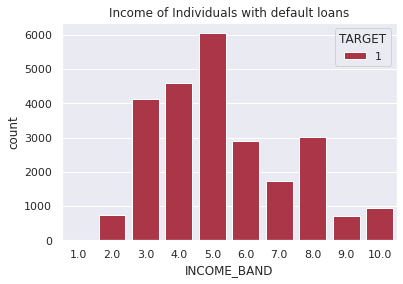

In [121]:
sns.countplot(data=df_train[df_train.TARGET==1],
              x='INCOME_BAND',hue='TARGET',
              palette = ["#BE223A"]).set_title('Income of Individuals with default loans');

In [122]:
# CREATE NEW COLUMN : PERCENT_ANNUITY_INCOME
list_col_new_annuity

['AMT_ANNUITY', 'AMT_INCOME_TOTAL']

In [123]:
def create_perc(df,col1,col2,newcol):
    df[newcol] = round((df[col1]/df[col2])*100,2)
    df[newcol] = df[newcol].fillna(0)
    return df

In [124]:
create_perc(df_train,'AMT_ANNUITY','AMT_INCOME_TOTAL','PERCENT_ANNUITY_INCOME');
create_perc(df_test,'AMT_ANNUITY','AMT_INCOME_TOTAL','PERCENT_ANNUITY_INCOME');

In [125]:
df_test[['AMT_INCOME_TOTAL','AMT_ANNUITY','PERCENT_ANNUITY_INCOME']].head()

AMT_INCOME_TOTAL  AMT_ANNUITY  PERCENT_ANNUITY_INCOME
0          135000.0      20560.5                   15.23
1           99000.0      17370.0                   17.55
2          202500.0      69777.0                   34.46
3          315000.0      49018.5                   15.56
4          180000.0      32067.0                   17.82

In [126]:
# CREATE NEW COLUMN : PERCENT_CREDIT_INCOME
list_col_new_credit

['AMT_CREDIT', 'AMT_INCOME_TOTAL']

In [127]:
create_perc(df_train,'AMT_INCOME_TOTAL','AMT_CREDIT','PERCENT_CREDIT_INCOME');
create_perc(df_test,'AMT_INCOME_TOTAL','AMT_CREDIT','PERCENT_CREDIT_INCOME');

In [128]:
df_test[['AMT_INCOME_TOTAL','AMT_CREDIT','PERCENT_CREDIT_INCOME']].head()

AMT_INCOME_TOTAL  AMT_CREDIT  PERCENT_CREDIT_INCOME
0          135000.0    568800.0                  23.73
1           99000.0    222768.0                  44.44
2          202500.0    663264.0                  30.53
3          315000.0   1575000.0                  20.00
4          180000.0    625500.0                  28.78

In [129]:
# CREATE NEW COLUMN : EXP_CAR 
list_col_new_car

['OWN_CAR_AGE']

In [130]:
# Create EXP_CAR to group car age
def create_car_band(df):
    df.loc[(df.OWN_CAR_AGE == 0 ),'EXP_CAR'] = 1
    df.loc[(df.OWN_CAR_AGE >= 1)&(df.OWN_CAR_AGE < 4),'EXP_CAR'] = 2
    df.loc[(df.OWN_CAR_AGE >= 4)&(df.OWN_CAR_AGE < 8),'EXP_CAR'] = 3
    df.loc[(df.OWN_CAR_AGE >= 8)&(df.OWN_CAR_AGE < 11),'EXP_CAR'] = 4
    df.loc[(df.OWN_CAR_AGE >= 11)&(df.OWN_CAR_AGE < 15),'EXP_CAR'] = 5
    df.loc[(df.OWN_CAR_AGE >= 15)&(df.OWN_CAR_AGE < 20),'EXP_CAR'] = 6
    df.loc[(df.OWN_CAR_AGE >= 20 ),'EXP_CAR'] = 7
    df['EXP_CAR'] = df['EXP_CAR'].fillna(0)
    return df

In [131]:
create_car_band(df_train);
create_car_band(df_test);

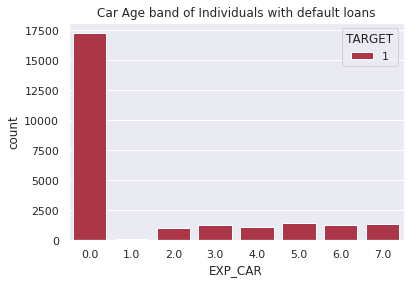

In [132]:
sns.countplot(data=df_train[df_train.TARGET==1],
              x='EXP_CAR',
              hue='TARGET',
              palette = ["#BE223A"]
          ).set_title('Car Age band of Individuals with default loans');

In [133]:
# CREATE NEW COLUMN : EXP_HOUSE 
list_col_new_house;

In [134]:
df_train[list_col_new_house].describe()

APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  \
count    151450.00000     127568.000000                157504.000000   
mean          0.11744          0.088442                     0.977735   
std           0.10824          0.082438                     0.059223   
min           0.00000          0.000000                     0.000000   
25%           0.05770          0.044200                     0.976700   
50%           0.08760          0.076300                     0.981600   
75%           0.14850          0.112200                     0.986600   
max           1.00000          1.000000                     1.000000   

       YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  \
count    103023.000000    92646.000000  143620.000000  152683.000000   
mean          0.752471        0.044621       0.078942       0.149725   
std           0.113280        0.076036       0.134576       0.100049   
min           0.000000        0.000000       0.000000       0.000000   
25%           0.687200        0.007800       0.000000       0.069000   
50%           0.755200        0.021100       0.000000       0.137900   
75%           0.823200        0.051500       0.120000       0.206900   
max           1.000000        1.000000       1.000000       1.000000   

       FLOORSMAX_AVG  FLOORSMIN_AVG   LANDAREA_AVG  ...  ELEVATORS_MEDI  \
count  154491.000000   98869.000000  124921.000000  ...   143620.000000   
mean        0.226282       0.231894       0.066333  ...        0.078078   
std         0.144641       0.161380       0.081184  ...        0.134467   
min         0.000000       0.000000       0.000000  ...        0.000000   
25%         0.166700       0.083300       0.018700  ...        0.000000   
50%         0.166700       0.208300       0.048100  ...        0.000000   
75%         0.333300       0.375000       0.085600  ...        0.120000   
max         1.000000       1.000000       1.000000  ...        1.000000   

       ENTRANCES_MEDI  FLOORSMAX_MEDI  FLOORSMIN_MEDI  LANDAREA_MEDI  \
count   152683.000000   154491.000000    98869.000000  124921.000000   
mean         0.149213        0.225897        0.231625       0.067169   
std          0.100368        0.145067        0.161934       0.082167   
min          0.000000        0.000000        0.000000       0.000000   
25%          0.069000        0.166700        0.083300       0.018700   
50%          0.137900        0.166700        0.208300       0.048700   
75%          0.206900        0.333300        0.375000       0.086800   
max          1.000000        1.000000        1.000000       1.000000   

       LIVINGAPARTMENTS_MEDI  LIVINGAREA_MEDI  NONLIVINGAPARTMENTS_MEDI  \
count           97312.000000    153161.000000              93997.000000   
mean                0.101954         0.108607                  0.008651   
std                 0.093642         0.112260                  0.047415   
min                 0.000000         0.000000                  0.000000   
25%                 0.051300         0.045700                  0.000000   
50%                 0.076100         0.074900                  0.000000   
75%                 0.123100         0.130300                  0.003900   
max                 1.000000         1.000000                  1.000000   

       NONLIVINGAREA_MEDI  TOTALAREA_MODE  
count       137829.000000   159080.000000  
mean             0.028236        0.102547  
std              0.070166        0.107462  
min              0.000000        0.000000  
25%              0.000000        0.041200  
50%              0.003100        0.068800  
75%              0.026600        0.127600  
max              1.000000        1.000000  

[8 rows x 43 columns]

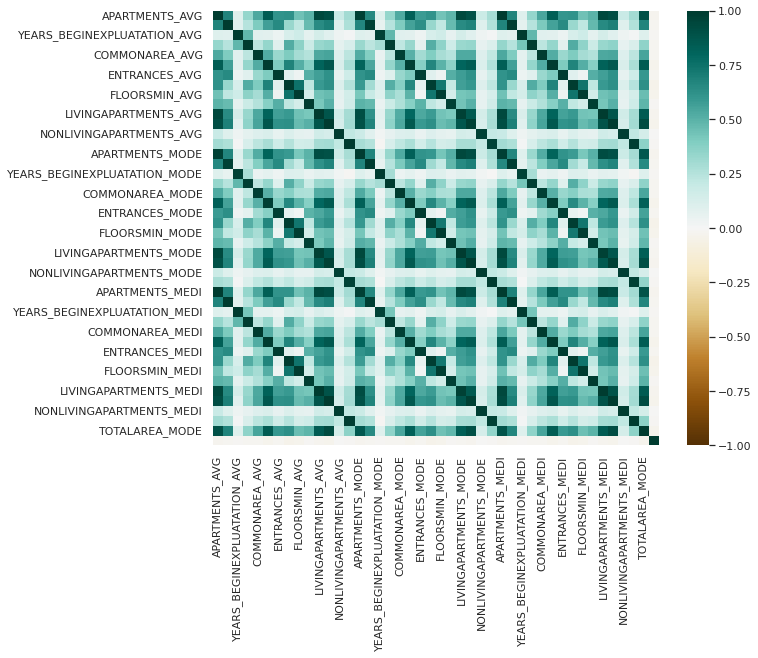

In [135]:
list_col_new_house_copy = list_col_new_house.copy()
list_col_new_house_copy.extend(['TARGET'])
plt.subplots(figsize=(10,8))
sns.heatmap(df_train[list_col_new_house_copy].corr(),vmin=-1,vmax=1,cmap='BrBG');

In [136]:
# DROP THE MEDIAN AND MODE APARTMENT MEASUREMENTS SINCE ALL ARE HIGHLY CORRELATED. CREATE ONE FEATURE FOR THE REMAINING AVG MEASUREMENT.
list_col_new_house_avg = list_col_new_house[0:14].copy()

In [137]:
create_sum_cols(df_train,list_col_new_house_avg,'EXP_HOUSE');
create_sum_cols(df_test,list_col_new_house_avg,'EXP_HOUSE');

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


In [138]:
df_test[['EXP_HOUSE']].head()

EXP_HOUSE
0     1.4116
1     0.0000
2     0.0000
3     4.4384
4     0.0000

In [139]:
# SINCE WE NOW HAVE NEW FEATURES, WE CAN NOW REMOVE EXSITING ONES 
list_col_drop.extend(list_col_new_income)  
list_col_drop.extend(list_col_new_annuity)
list_col_drop.extend(list_col_new_credit) 
list_col_drop.extend(list_col_new_car) 
list_col_drop.extend(list_col_new_house)  

We can now finally remove all the other unecessary columns.

In [140]:
def remove_dups(x):
  return list(dict.fromkeys(x))

In [141]:
print('Original column list count to drop:',len(list_col_drop)) #114

Original column list count to drop: 114


In [142]:
list_col_drop_new = remove_dups(list_col_drop)

In [143]:
print('Column list count to drop (duplicates removed):',len(list_col_drop_new)) #112

Column list count to drop (duplicates removed): 112


In [144]:
# UPDATED DATAFRAME
df_train.drop(list_col_drop_new,axis=1,inplace=True)
df_test.drop(list_col_drop_new,axis=1,inplace=True)

# PRINT UPDATED DATAFRAME
df_train

TARGET  CODE_GENDER  NAME_EDUCATION_TYPE  REGION_POPULATION_RELATIVE  \
0            1            1                    2                    0.018801   
1            0            2                    4                    0.003541   
2            0            1                    2                    0.010032   
3            0            2                    2                    0.008019   
4            0            1                    2                    0.028663   
...        ...          ...                  ...                         ...   
307506       0            1                    2                    0.032561   
307507       0            2                    2                    0.025164   
307508       0            2                    4                    0.005002   
307509       1            2                    2                    0.005313   
307510       0            2                    4                    0.046220   

        CNT_FAM_MEMBERS  REGION_RATING_CLIENT  ORGANIZATION_TYPE  \
0                   1.0                     2                  6   
1                   2.0                     1                 40   
2                   1.0                     2                 12   
3                   2.0                     2                  6   
4                   1.0                     2                 38   
...                 ...                   ...                ...   
307506              1.0                     1                 44   
307507              1.0                     2                 58   
307508              1.0                     3                 40   
307509              2.0                     2                  4   
307510              2.0                     1                  6   

        EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  ...  FLAG_CONTACTS  \
0           0.083037      0.262949      0.139376  ...              4   
1           0.311267      0.622246      0.510853  ...              4   
2           0.502130      0.555912      0.729567  ...              5   
3           0.502130      0.650442      0.510853  ...              3   
4           0.502130      0.322738      0.510853  ...              3   
...              ...           ...           ...  ...            ...   
307506      0.145570      0.681632      0.510853  ...              3   
307507      0.502130      0.115992      0.510853  ...              3   
307508      0.744026      0.535722      0.218859  ...              4   
307509      0.502130      0.514163      0.661024  ...              3   
307510      0.734460      0.708569      0.113922  ...              5   

        FLAG_DOCS  FLAG_ADDR   AGE  YEARS_EMPLOYED  INCOME_BAND  \
0               1          0  26.0             2.0          7.0   
1               1          0  46.0             3.0          8.0   
2               0          0  52.0             1.0          3.0   
3               1          0  52.0             8.0          5.0   
4               1          1  55.0             8.0          4.0   
...           ...        ...   ...             ...          ...   
307506          1          0  26.0             1.0          5.0   
307507          1          0  57.0            80.0          3.0   
307508          1          1  41.0            22.0          5.0   
307509          1          1  33.0            13.0          6.0   
307510          1          1  46.0             3.0          5.0   

        PERCENT_ANNUITY_INCOME  PERCENT_CREDIT_INCOME  EXP_CAR  EXP_HOUSE  
0                        12.20                  49.80      0.0     2.0207  
1                        13.22                  20.87      0.0     2.8790  
2                        10.00                  50.00      7.0     0.0000  
3                        21.99                  43.17      0.0     0.0000  
4                        18.00                  23.68      0.0     0.0000  
...                        ...                    ...      ...        ...  
307506                   17.

In [145]:
df_train.describe()

TARGET    CODE_GENDER  NAME_EDUCATION_TYPE  \
count  307511.000000  307511.000000        307511.000000   
mean        0.080729       1.658331             2.509507   
std         0.272419       0.474297             0.874544   
min         0.000000       0.000000             1.000000   
25%         0.000000       1.000000             2.000000   
50%         0.000000       2.000000             2.000000   
75%         0.000000       2.000000             3.000000   
max         1.000000       2.000000             5.000000   

       REGION_POPULATION_RELATIVE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count               307511.000000    307511.000000         307511.000000   
mean                     0.020868         2.152651              2.052463   
std                      0.013831         0.910695              0.509034   
min                      0.000290         0.000000              1.000000   
25%                      0.010006         2.000000              2.000000   
50%                      0.018850         2.000000              2.000000   
75%                      0.028663         3.000000              2.000000   
max                      0.072508        20.000000              3.000000   

       ORGANIZATION_TYPE   EXT_SOURCE_1  EXT_SOURCE_2   EXT_SOURCE_3  ...  \
count      307511.000000  307511.000000  3.075110e+05  307511.000000  ...   
mean           30.450429       0.502130  5.143927e-01       0.510853  ...   
std            20.463558       0.139395  1.908550e-01       0.174464  ...   
min             1.000000       0.014568  8.173617e-08       0.000527  ...   
25%             6.000000       0.502130  3.929737e-01       0.417100  ...   
50%            34.000000       0.502130  5.654672e-01       0.510853  ...   
75%            48.000000       0.502130  6.634218e-01       0.636376  ...   
max            58.000000       0.962693  8.549997e-01       0.896010  ...   

       FLAG_CONTACTS      FLAG_DOCS      FLAG_ADDR            AGE  \
count  307511.000000  307511.000000  307511.000000  307511.000000   
mean        3.355174       0.930155       0.313530      43.938646   
std         0.865288       0.344295       0.587047      11.964047   
min         1.000000       0.000000       0.000000      21.000000   
25%         3.000000       1.000000       0.000000      34.000000   
50%         3.000000       1.000000       0.000000      43.000000   
75%         4.000000       1.000000       1.000000      54.000000   
max         6.000000       4.000000       4.000000      69.000000   

       YEARS_EMPLOYED    INCOME_BAND  PERCENT_ANNUITY_INCOME  \
count   307511.000000  307511.000000           307511.000000   
mean        19.762070       5.464998               18.092302   
std         28.820458       2.090305                9.457877   
min          0.000000       1.000000                0.000000   
25%          3.000000       4.000000               11.480000   
50%          6.000000       5.000000               16.280000   
75%         16.000000       7.000000               22.910000   
max         80.000000      10.000000              187.600000   

       PERCENT_CREDIT_INCOME        EXP_CAR      EXP_HOUSE  
count          307511.000000  307511.000000  307511.000000  
mean               39.966979       1.442280       1.275322  
std                50.792374       2.246979       1.439961  
min                 1.180000       0.000000       0.000000  
25%                19.380000       0.000000       0.000000  
50%                30.630000       0.000000       1.036000  
75%                49.540000       3.000000       2.466600  
max             20800.330000       7.000000      11.256800  

[8 rows x 21 columns]

# Modeling-V1 and Evaluation

In [146]:
X = df_train.drop(columns='TARGET',axis=1)
y = df_train.TARGET

X_pred = df_test

In [199]:
X.columns

Index(['CODE_GENDER', 'NAME_EDUCATION_TYPE', 'REGION_POPULATION_RELATIVE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'ORGANIZATION_TYPE',
       'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'FLAG_ASSET',
       'FLAG_CONTACTS', 'FLAG_DOCS', 'FLAG_ADDR', 'AGE', 'YEARS_EMPLOYED',
       'INCOME_BAND', 'PERCENT_ANNUITY_INCOME', 'PERCENT_CREDIT_INCOME',
       'EXP_CAR', 'EXP_HOUSE'],
      dtype='object')

In [148]:
X_pred

CODE_GENDER  NAME_EDUCATION_TYPE  REGION_POPULATION_RELATIVE  \
0                2                    4                    0.018850   
1                1                    2                    0.035792   
2                1                    4                    0.019101   
3                2                    2                    0.026392   
4                1                    2                    0.010032   
...            ...                  ...                         ...   
48739            2                    2                    0.002042   
48740            2                    2                    0.035792   
48741            2                    2                    0.026392   
48742            1                    4                    0.018850   
48743            2                    2                    0.006629   

       CNT_FAM_MEMBERS  REGION_RATING_CLIENT  ORGANIZATION_TYPE  EXT_SOURCE_1  \
0                  2.0                     2                 29      0.752614   
1                  2.0                     2                 43      0.564990   
2                  2.0                     2                 55      0.501180   
3                  4.0                     2                  6      0.525734   
4                  3.0                     2                  6      0.202145   
...                ...                   ...                ...           ...   
48739              1.0                     3                 34      0.501180   
48740              4.0                     2                 52      0.501180   
48741              3.0                     2                  6      0.733503   
48742              2.0                     2                 43      0.373090   
48743              2.0                     2                 12      0.501180   

       EXT_SOURCE_2  EXT_SOURCE_3  FLAG_ASSET  FLAG_CONTACTS  FLAG_DOCS  \
0          0.789654      0.159520         2.0              4          1   
1          0.291656      0.432962         2.0              3          1   
2          0.699787      0.610991         3.0              3          1   
3          0.509677      0.612704         2.0              4          1   
4          0.425687      0.500106         1.0              4          1   
...             ...           ...         ...            ...        ...   
48739      0.648575      0.643026         2.0              5          1   
48740      0.684596      0.500106         0.0              3          1   
48741      0.632770      0.283712         3.0              4          1   
48742      0.445701      0.595456         0.0              5          1   
48743      0.456541      0.272134         1.0              4          1   

       FLAG_ADDR   AGE  YEARS_EMPLOYED  INCOME_BAND  PERCENT_ANNUITY_INCOME  \
0              0  53.0             6.0          5.0                   15.23   
1              0  49.0            12.0          4.0                   17.55   
2              0  55.0            12.0          7.0                   34.46   
3              0  38.0             5.0          9.0                   15.56   
4              1  36.0             6.0          6.0                   17.82   
...          ...   ...             ...          ...                     ...   
48739          0  55.0            14.0          4.0                   14.38   
48740          1  31.0             3.0          5.0                   20.26   
48741          0  44.0             8.0          7.0                   16.40   
48742          2  38.0             7.0          8.0                   11.17   
48743          0  38.0             2.0          5.0                   18.30   

       PERCENT_CREDIT_INCOME  EXP_CAR  EXP_HOUSE  
0                      23.73      0.0     1.4116  
1                      44.44      0.0     0.0000  
2                      30.53      3.0     0.0000  
3                      20.00      0.0     4.4384  
4                      28.78      6.0     0.0000  
...                      

##LGBMClassifier

In [149]:
import time
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

In [150]:
folds = StratifiedKFold(n_splits=5)
oof_preds = np.zeros(X.shape[0])
sub_preds = np.zeros(X_pred.shape[0])

In [151]:
start = time.time()
valid_score = 0
for n_fold, (trn_idx, val_idx) in enumerate(folds.split(X, y)):
    trn_x, trn_y = X.iloc[trn_idx], y[trn_idx]
    val_x, val_y = X.iloc[val_idx], y[val_idx]    
    
    train_data = lgb.Dataset(data=trn_x, label=trn_y)
    valid_data = lgb.Dataset(data=val_x, label=val_y)
    
    param = {'application':'binary','num_iterations':4000, 'learning_rate':0.05, 'num_leaves':24, 'feature_fraction':0.8, 'bagging_fraction':0.9,
             'lambda_l1':0.1, 'lambda_l2':0.1, 'min_split_gain':0.01, 'early_stopping_round':100, 'max_depth':7, 'min_child_weight':40, 'metric':'auc'}
    lgb_es_model = lgb.train(param, train_data, valid_sets=[train_data, valid_data], verbose_eval=100) 
    
    oof_preds[val_idx] = lgb_es_model.predict(val_x, num_iteration=lgb_es_model.best_iteration)
    sub_preds += lgb_es_model.predict(X_pred, num_iteration=lgb_es_model.best_iteration) / folds.n_splits
    print('Fold %2d AUC : %.6f' % (n_fold + 1, roc_auc_score(val_y, oof_preds[val_idx])))
    valid_score += roc_auc_score(val_y, oof_preds[val_idx])

print('valid score:', str(round(valid_score/folds.n_splits,4)))

end = time.time()
print('training time:', str(round((end - start)/60)), 'mins')

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[100]	training's auc: 0.757655	valid_1's auc: 0.74676
[200]	training's auc: 0.768327	valid_1's auc: 0.750914
[300]	training's auc: 0.776187	valid_1's auc: 0.751944
[400]	training's auc: 0.782865	valid_1's auc: 0.75207
[500]	training's auc: 0.789275	valid_1's auc: 0.752259
Early stopping, best iteration is:
[485]	training's auc: 0.788286	valid_1's auc: 0.752343
Fold  1 AUC : 0.752343


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[100]	training's auc: 0.757844	valid_1's auc: 0.746674
[200]	training's auc: 0.768449	valid_1's auc: 0.750727
[300]	training's auc: 0.776096	valid_1's auc: 0.751564
[400]	training's auc: 0.783026	valid_1's auc: 0.751989
[500]	training's auc: 0.788883	valid_1's auc: 0.752399
[600]	training's auc: 0.794488	valid_1's auc: 0.752767
[700]	training's auc: 0.799353	valid_1's auc: 0.75285
[800]	training's auc: 0.804219	valid_1's auc: 0.752675
Early stopping, best iteration is:
[700]	training's auc: 0.799353	valid_1's auc: 0.75285
Fold  2 AUC : 0.752850


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[100]	training's auc: 0.758917	valid_1's auc: 0.739815
[200]	training's auc: 0.769856	valid_1's auc: 0.743408
[300]	training's auc: 0.777601	valid_1's auc: 0.744089
[400]	training's auc: 0.784065	valid_1's auc: 0.743949
[500]	training's auc: 0.790521	valid_1's auc: 0.744158
Early stopping, best iteration is:
[435]	training's auc: 0.786577	valid_1's auc: 0.744187
Fold  3 AUC : 0.744187


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[100]	training's auc: 0.757632	valid_1's auc: 0.747784
[200]	training's auc: 0.768913	valid_1's auc: 0.751345
[300]	training's auc: 0.77693	valid_1's auc: 0.752115
[400]	training's auc: 0.783629	valid_1's auc: 0.752372
Early stopping, best iteration is:
[382]	training's auc: 0.78246	valid_1's auc: 0.752429
Fold  4 AUC : 0.752429


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[100]	training's auc: 0.756853	valid_1's auc: 0.748919
[200]	training's auc: 0.76787	valid_1's auc: 0.752349
[300]	training's auc: 0.775471	valid_1's auc: 0.753382
[400]	training's auc: 0.782169	valid_1's auc: 0.753831
Early stopping, best iteration is:
[399]	training's auc: 0.782139	valid_1's auc: 0.753835
Fold  5 AUC : 0.753835
valid score: 0.7511
training time: 3 mins


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

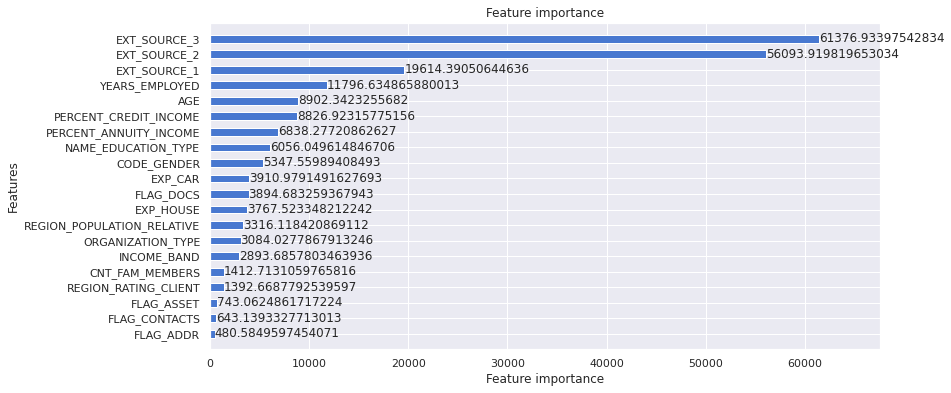

In [152]:
lgb.plot_importance(lgb_es_model, height=0.5, max_num_features=20, ignore_zero = False, figsize = (12,6), importance_type ='gain')

##Logistic Regression

In [153]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, test_size=0.10,
                                                    random_state=101)

In [155]:
X_train.shape,X_test.shape

((276759, 20), (30752, 20))

In [156]:
y_train.shape, y_test.shape

((276759,), (30752,))

In [157]:
#LOGREG
reg_algorithm = LogisticRegression()
reg_algorithm.fit(X_train,y_train)
predictions = reg_algorithm.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))


[[28329     9]
 [ 2411     3]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     28338
           1       0.25      0.00      0.00      2414

    accuracy                           0.92     30752
   macro avg       0.59      0.50      0.48     30752
weighted avg       0.87      0.92      0.88     30752



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [158]:
from sklearn.metrics import roc_curve, roc_auc_score

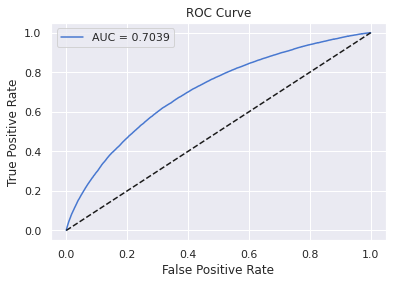

In [159]:
log_reg_probabilities1 = reg_algorithm.predict_proba(X)[:, 1]
fpr, tpr, tr = roc_curve(y, log_reg_probabilities1)
auc = roc_auc_score(y, log_reg_probabilities1)

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

## Decision Tree Classifier

In [160]:
#dtree
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
dt_pred = dt_model.predict(X_test)
print(confusion_matrix(y_test,dt_pred))
print(classification_report(y_test,dt_pred))

[[25738  2600]
 [ 2012   402]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92     28338
           1       0.13      0.17      0.15      2414

    accuracy                           0.85     30752
   macro avg       0.53      0.54      0.53     30752
weighted avg       0.87      0.85      0.86     30752



In [161]:
y_pred_proba0 = dt_model.predict_proba(X)[:][:,1]

In [162]:
print("ROC",  roc_auc_score(y,y_pred_proba0))

ROC 0.9548775922732128


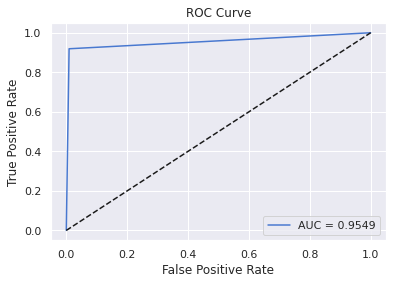

In [163]:
fpr, tpr, tr = roc_curve(y, y_pred_proba0)
auc = roc_auc_score(y, y_pred_proba0)

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

## Random Forest Classifier

In [164]:
#random forest
rf_model= RandomForestClassifier(n_estimators=300)
rf_model.fit(X_train,y_train)
rf_pre=rf_model.predict(X_test)
print(confusion_matrix(y_test,rf_pre))
print(classification_report(y_test,rf_pre))

[[28320    18]
 [ 2391    23]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     28338
           1       0.56      0.01      0.02      2414

    accuracy                           0.92     30752
   macro avg       0.74      0.50      0.49     30752
weighted avg       0.89      0.92      0.89     30752



In [165]:
y_pred_proba = rf_model.predict_proba(X)[:][:,1]

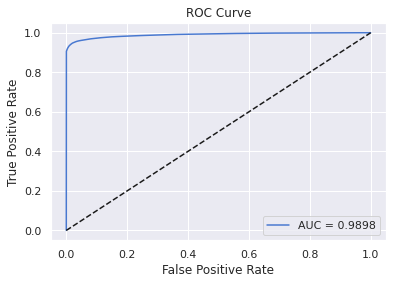

In [166]:
fpr, tpr, tr = roc_curve(y, y_pred_proba)
auc = roc_auc_score(y, y_pred_proba)

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

In [167]:
print("ROC",  roc_auc_score(y,y_pred_proba))

ROC 0.9898434676406124


## XGB Classifier

In [168]:
#XGBOOST
xgb_model = XGBClassifier(n_estimators=300)
xgb_model.fit(X_train,y_train)
xg_pred = xgb_model.predict(X_test)
print(confusion_matrix(y_test,xg_pred))
print(classification_report(y_test,xg_pred))

[[28311    27]
 [ 2379    35]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     28338
           1       0.56      0.01      0.03      2414

    accuracy                           0.92     30752
   macro avg       0.74      0.51      0.49     30752
weighted avg       0.89      0.92      0.89     30752



In [169]:
y_pred_proba1 = xgb_model.predict_proba(X)[:][:,1]

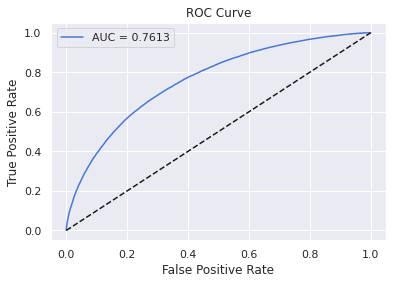

In [170]:
fpr, tpr, tr = roc_curve(y, y_pred_proba1)
auc = roc_auc_score(y, y_pred_proba1)

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

In [171]:
print("ROC",  roc_auc_score(y,y_pred_proba1))

ROC 0.761252001881334


<a id='implementation'></a>
# Implementation

In [172]:
# PREDICT!
application_test= pd.read_csv('/content/drive/MyDrive/SI @RUANGGURU-CAMP : DATA,BUSINESS ANALYTICS & OPERATIONS/7. VIRTUAL INTERN RAKAMIN/HOME-CREDIT-INDONESIA/application_test.csv')
output = pd.DataFrame({'SK_ID_CURR':application_test.SK_ID_CURR, 'TARGET': sub_preds})
output.to_csv('application_pred.csv', index=False)

In [173]:
output.head()

SK_ID_CURR    TARGET
0      100001  0.033243
1      100005  0.145996
2      100013  0.026670
3      100028  0.042062
4      100038  0.111265

That's all folks for this Home Credit Risk Classification project. Do leave a note for feedback and improvement. Thank you for reading and spending some time on this project. :-)

# Modeling-V2 (Fix) and Evaluation

In [174]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [175]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler

# Load data
tr_features = df_train.drop('TARGET', axis=1).copy().astype(float)
tr_labels = df_train[['TARGET']].copy().astype(float)


In [176]:
rus = RandomUnderSampler(random_state=20)
tr_features_resample, tr_labels_resample = rus.fit_resample(tr_features, tr_labels)
pd.concat([tr_features_resample, tr_labels_resample], axis=1).groupby('TARGET').count()

CODE_GENDER  NAME_EDUCATION_TYPE  REGION_POPULATION_RELATIVE  \
TARGET                                                                 
0.0           24825                24825                       24825   
1.0           24825                24825                       24825   

        CNT_FAM_MEMBERS  REGION_RATING_CLIENT  ORGANIZATION_TYPE  \
TARGET                                                             
0.0               24825                 24825              24825   
1.0               24825                 24825              24825   

        EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  FLAG_ASSET  FLAG_CONTACTS  \
TARGET                                                                        
0.0            24825         24825         24825       24825          24825   
1.0            24825         24825         24825       24825          24825   

        FLAG_DOCS  FLAG_ADDR    AGE  YEARS_EMPLOYED  INCOME_BAND  \
TARGET                                                             
0.0         24825      24825  24825           24825        24825   
1.0         24825      24825  24825           24825        24825   

        PERCENT_ANNUITY_INCOME  PERCENT_CREDIT_INCOME  EXP_CAR  EXP_HOUSE  
TARGET                                                                     
0.0                      24825                  24825    24825      24825  
1.0                      24825                  24825    24825      24825

In [177]:
#TRAINING
def print_results(results: GridSearchCV):

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))
    print('BEST PARAMS: {}\n'.format(results.best_params_))

## Logistic Regression

In [178]:
lr = LogisticRegression()
lr_params = {
    'C': [0.001, 0.005, 0.01, 0.05, 0.1, 1, 10, 100, 1000]
}
lr_cv = GridSearchCV(lr, lr_params, cv=3, verbose=3)
lr_cv.fit(tr_features_resample, tr_labels_resample.values)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END ...........................C=0.001;, score=0.638 total time=   0.7s
[CV 2/3] END ...........................C=0.001;, score=0.630 total time=   0.7s
[CV 3/3] END ...........................C=0.001;, score=0.638 total time=   0.8s
[CV 1/3] END ...........................C=0.005;, score=0.655 total time=   0.7s
[CV 2/3] END ...........................C=0.005;, score=0.647 total time=   0.8s
[CV 3/3] END ...........................C=0.005;, score=0.649 total time=   0.7s
[CV 1/3] END ............................C=0.01;, score=0.655 total time=   0.8s
[CV 2/3] END ............................C=0.01;, score=0.645 total time=   0.7s
[CV 3/3] END ............................C=0.01;, score=0.654 total time=   0.8s
[CV 1/3] END ............................C=0.05;, score=0.653 total time=   0.7s
[CV 2/3] END ............................C=0.05;, score=0.640 total time=   0.7s
[CV 3/3] END ............................C=0.05;,

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.005, 0.01, 0.05, 0.1, 1, 10, 100,
                               1000]},
             verbose=3)

In [179]:
print_results(lr_cv)

0.635 (+/-0.008) for {'C': 0.001}
0.65 (+/-0.006) for {'C': 0.005}
0.651 (+/-0.009) for {'C': 0.01}
0.65 (+/-0.014) for {'C': 0.05}
0.647 (+/-0.009) for {'C': 0.1}
0.648 (+/-0.011) for {'C': 1}
0.647 (+/-0.006) for {'C': 10}
0.65 (+/-0.01) for {'C': 100}
0.65 (+/-0.007) for {'C': 1000}
BEST PARAMS: {'C': 0.01}



## Random Forest

In [180]:
#Random Forest
rf = RandomForestClassifier()
rf_params = {
    'n_estimators': [5, 20, 250],
    'max_depth': [2, 4, 8, 16, 32]
}
rf_cv = GridSearchCV(rf, rf_params, cv=3, verbose=3)
rf_cv.fit(tr_features_resample, tr_labels_resample.values.ravel())

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV 1/3] END .......max_depth=2, n_estimators=5;, score=0.646 total time=   0.1s
[CV 2/3] END .......max_depth=2, n_estimators=5;, score=0.644 total time=   0.1s
[CV 3/3] END .......max_depth=2, n_estimators=5;, score=0.619 total time=   0.1s
[CV 1/3] END ......max_depth=2, n_estimators=20;, score=0.657 total time=   0.3s
[CV 2/3] END ......max_depth=2, n_estimators=20;, score=0.654 total time=   0.3s
[CV 3/3] END ......max_depth=2, n_estimators=20;, score=0.663 total time=   0.3s
[CV 1/3] END .....max_depth=2, n_estimators=250;, score=0.661 total time=   3.7s
[CV 2/3] END .....max_depth=2, n_estimators=250;, score=0.658 total time=   3.7s
[CV 3/3] END .....max_depth=2, n_estimators=250;, score=0.666 total time=   3.5s
[CV 1/3] END .......max_depth=4, n_estimators=5;, score=0.647 total time=   0.1s
[CV 2/3] END .......max_depth=4, n_estimators=5;, score=0.655 total time=   0.1s
[CV 3/3] END .......max_depth=4, n_estimators=5;

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 8, 16, 32],
                         'n_estimators': [5, 20, 250]},
             verbose=3)

In [181]:
print_results(rf_cv)

0.636 (+/-0.025) for {'max_depth': 2, 'n_estimators': 5}
0.658 (+/-0.007) for {'max_depth': 2, 'n_estimators': 20}
0.661 (+/-0.007) for {'max_depth': 2, 'n_estimators': 250}
0.655 (+/-0.013) for {'max_depth': 4, 'n_estimators': 5}
0.665 (+/-0.011) for {'max_depth': 4, 'n_estimators': 20}
0.67 (+/-0.008) for {'max_depth': 4, 'n_estimators': 250}
0.665 (+/-0.004) for {'max_depth': 8, 'n_estimators': 5}
0.676 (+/-0.007) for {'max_depth': 8, 'n_estimators': 20}
0.678 (+/-0.008) for {'max_depth': 8, 'n_estimators': 250}
0.64 (+/-0.002) for {'max_depth': 16, 'n_estimators': 5}
0.667 (+/-0.007) for {'max_depth': 16, 'n_estimators': 20}
0.679 (+/-0.007) for {'max_depth': 16, 'n_estimators': 250}
0.621 (+/-0.007) for {'max_depth': 32, 'n_estimators': 5}
0.653 (+/-0.003) for {'max_depth': 32, 'n_estimators': 20}
0.677 (+/-0.005) for {'max_depth': 32, 'n_estimators': 250}
BEST PARAMS: {'max_depth': 16, 'n_estimators': 250}



## Multi layer perceptron

In [182]:
#Multi layer perceptron
mlp = MLPClassifier()
mlp_params = {
    'hidden_layer_sizes': [(10,), (50,), (100,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

mlp_cv = GridSearchCV(mlp, mlp_params, cv=3, verbose=3)
mlp_cv.fit(tr_features_resample, tr_labels_resample.values)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV 1/3] END activation=relu, hidden_layer_sizes=(10,), learning_rate=constant;, score=0.669 total time=   4.0s
[CV 2/3] END activation=relu, hidden_layer_sizes=(10,), learning_rate=constant;, score=0.655 total time=   6.0s
[CV 3/3] END activation=relu, hidden_layer_sizes=(10,), learning_rate=constant;, score=0.675 total time=   4.6s
[CV 1/3] END activation=relu, hidden_layer_sizes=(10,), learning_rate=invscaling;, score=0.674 total time=   5.6s
[CV 2/3] END activation=relu, hidden_layer_sizes=(10,), learning_rate=invscaling;, score=0.666 total time=   7.9s
[CV 3/3] END activation=relu, hidden_layer_sizes=(10,), learning_rate=invscaling;, score=0.677 total time=  10.8s
[CV 1/3] END activation=relu, hidden_layer_sizes=(10,), learning_rate=adaptive;, score=0.663 total time=  11.0s
[CV 2/3] END activation=relu, hidden_layer_sizes=(10,), learning_rate=adaptive;, score=0.666 total time=   7.2s
[CV 3/3] END activation=relu, hidden_

GridSearchCV(cv=3, estimator=MLPClassifier(),
             param_grid={'activation': ['relu', 'tanh', 'logistic'],
                         'hidden_layer_sizes': [(10,), (50,), (100,)],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive']},
             verbose=3)

In [183]:
print_results(mlp_cv)

0.667 (+/-0.017) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'constant'}
0.672 (+/-0.009) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'invscaling'}
0.666 (+/-0.005) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'adaptive'}
0.667 (+/-0.017) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant'}
0.671 (+/-0.006) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'invscaling'}
0.662 (+/-0.02) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive'}
0.672 (+/-0.007) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}
0.671 (+/-0.003) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'invscaling'}
0.673 (+/-0.012) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive'}
0.672 (+/-0.008) for {'activation': 'tanh', 'hidden_layer_sizes': (10,), '

## Evaluation

### Model Performance

In [186]:
import joblib

models = {
    'LR': lr_cv.best_estimator_,
    'RF': rf_cv.best_estimator_,
    'MLP': mlp_cv.best_estimator_
    }

In [187]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
def eval_model(name, model, features, labels):
    pred = model.predict(features)
    acc = accuracy_score(labels, pred)
    prec = precision_score(labels, pred)
    rec = recall_score(labels, pred)
    f_1 = f1_score(labels, pred)
    roc_auc = roc_auc_score(labels, pred)
    print(f"{name}:\n     accuracy: {acc:.4f} | precision: {prec:.4f}\n     recall: {rec:.4f} | f_1: {f_1:.4f}\n     roc_auc: {roc_auc:.4f}")

for model in models:
    eval_model(model, models[model], tr_features_resample, tr_labels_resample)

LR:
     accuracy: 0.6451 | precision: 0.6502
     recall: 0.6279 | f_1: 0.6389
     roc_auc: 0.6451
RF:
     accuracy: 0.9096 | precision: 0.8977
     recall: 0.9247 | f_1: 0.9110
     roc_auc: 0.9096
MLP:
     accuracy: 0.6851 | precision: 0.6823
     recall: 0.6928 | f_1: 0.6875
     roc_auc: 0.6851


###  K-Fold Cross-Validation

In [188]:
from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits=10, shuffle=True, random_state=20)

In [195]:
new_rf = RandomForestClassifier(n_estimators=250, max_depth=16) # From the best previous hyperparameter
new_rf_f1 = cross_val_score(new_rf, tr_features_resample, tr_labels_resample.values.ravel(), cv=kfold, n_jobs=-1, scoring='f1')
new_rf_roc_auc = cross_val_score(new_rf, tr_features_resample, tr_labels_resample.values.ravel(), cv=kfold, n_jobs=-1, scoring='roc_auc')

In [194]:
new_mlp = MLPClassifier(activation= 'logistic', hidden_layer_sizes= 50, learning_rate= 'invscaling')  # From the best previous hyperparameter
new_mlp_f1 = cross_val_score(new_mlp, tr_features_resample, tr_labels_resample.values.ravel(), cv=kfold, n_jobs=-1, scoring='f1')
new_mlp_roc_auc = cross_val_score(new_mlp, tr_features_resample, tr_labels_resample.values.ravel(), cv=kfold, n_jobs=-1, scoring='roc_auc')

In [200]:
new_lr = LogisticRegression(C=0.1) # From the best previous hyperparameter
new_lr_f1 = cross_val_score(new_lr, tr_features_resample, tr_labels_resample.values.ravel(), cv=kfold, n_jobs=-1, scoring='f1')
new_lr_roc_auc = cross_val_score(new_lr, tr_features_resample, tr_labels_resample.values.ravel(), cv=kfold, n_jobs=-1, scoring='roc_auc')

In [201]:
print(f"Random Forest:\n    \
F1: {np.mean(new_rf_f1):.3f} +/- {np.std(new_rf_f1):.3f} | ROC_AUC: {np.mean(new_rf_roc_auc):.3f} +/- {np.std(new_rf_roc_auc):.3f}\n\
Multi Layer Perceptron :\n    \
F1: {np.mean(new_mlp_f1):.3f} +/- {np.std(new_mlp_f1):.3f} | ROC_AUC: {np.mean(new_mlp_roc_auc):.3f} +/- {np.std(new_mlp_roc_auc):.3f})\n\
Logistic Regression:\n    \
F1: {np.mean(new_lr_f1):.3f} +/- {np.std(new_lr_f1):.3f} | ROC_AUC: {np.mean(new_lr_roc_auc):.3f} +/- {np.std(new_lr_roc_auc):.3f}")

Random Forest:
    F1: 0.680 +/- 0.009 | ROC_AUC: 0.742 +/- 0.010
Multi Layer Perceptron :
    F1: 0.667 +/- 0.021 | ROC_AUC: 0.738 +/- 0.010)
Logistic Regression:
    F1: 0.644 +/- 0.010 | ROC_AUC: 0.700 +/- 0.012


### Final Model

In [204]:
final_rf = RandomForestClassifier()
final_rf_params = {
    'n_estimators': [200, 225, 250, 275, 300],
    'max_depth': [6, 7, 8, 9, 10]
}
final_rf_cv = GridSearchCV(rf, rf_params, cv=5, verbose=3, n_jobs=-1, scoring=['f1', 'roc_auc'], refit='roc_auc')
final_rf_cv.fit(tr_features_resample, tr_labels_resample.values.ravel())

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 8, 16, 32],
                         'n_estimators': [5, 20, 250]},
             refit='roc_auc', scoring=['f1', 'roc_auc'], verbose=3)